# Welcome to the Algorithmic Trading Society at Imperial





This course will introduce you to Algorithmic trading and enable you to come up with your own strategies using Technical Analysis and Machine Learning.

## Lecture 1 - Collecting and Analyzing Financial Data


In [1]:
! pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

### Importing Stock Price Data from Yahoo Finance

In [3]:
ticker = ["AAPL", "BA", "KO", "GOOGL", "DIS", "XOM" ]

In [4]:
stocks = yf.download(ticker, start = "2012-01-01", end = "2022-09-06")

[*********************100%***********************]  6 of 6 completed


In [5]:
stocks.head()

Adj Close                                                         \
                 AAPL         BA        DIS      GOOGL         KO        XOM   
Date                                                                           
2012-01-03  12.540050  60.731094  34.300621  16.651901  25.078627  55.358463   
2012-01-04  12.607437  60.821102  34.784100  16.723724  24.921307  55.371311   
2012-01-05  12.747408  60.166473  35.366070  16.491741  24.803318  55.203930   
2012-01-06  12.880662  60.534710  35.733170  16.266768  24.645998  54.791973   
2012-01-09  12.860232  60.984730  35.589912  15.577077  24.645998  55.036575   

                Close                                   ...       Open  \
                 AAPL         BA        DIS      GOOGL  ...        DIS   
Date                                                    ...              
2012-01-03  14.686786  74.220001  38.310001  16.651901  ...  37.970001   
2012-01-04  14.765714  74.330002  38.849998  16.723724  ...  38.189999   
2012-01-05  14.929643  73.529999  39.500000  16.491741  ...  38.830002   
2012-01-06  15.085714  73.980003  39.910000  16.266768  ...  39.549999   
2012-01-09  15.061786  74.529999  39.750000  15.577077  ...  39.740002   

                                                Volume                     \
                GOOGL         KO        XOM       AAPL       BA       DIS   
Date                                                                        
2012-01-03  16.339840  35.075001  85.970001  302220800  6859300   9704200   
2012-01-04  16.642391  34.955002  85.790001  260022000  4923000   9889900   
2012-01-05  16.569820  34.880001  85.639999  271269600  6797900  14327100   
2012-01-06  16.495245  34.735001  85.919998  318292800  4779800  14401600   
2012-01-09  16.178679  34.500000  85.000000  394024400  4469600  12145200   

                                           
                GOOGL        KO       XOM  
Date                                       
2012-01-03  146912940  15639600  20906800  
2012-01-04  114445440  14239200  16130900  
2012-01-05  131184684  14287600  17452800  
2012-01-06  107608284  13646600  15942100  
2012-01-09  232671096  10522600  11664200  

[5 rows x 36 columns]

In [6]:
stocks.tail()

Adj Close                                                 \
                  AAPL          BA         DIS       GOOGL         KO   
Date                                                                    
2022-08-29  161.380005  165.419998  113.529999  109.419998  62.275959   
2022-08-30  158.910004  162.210007  112.430000  108.940002  61.700157   
2022-08-31  157.220001  160.250000  112.080002  108.220001  61.263340   
2022-09-01  157.960007  153.660004  112.529999  109.739998  61.551243   
2022-09-02  155.809998  151.820007  111.199997  107.849998  60.707397   

                             Close                                      ...  \
                   XOM        AAPL          BA         DIS       GOOGL  ...   
Date                                                                    ...   
2022-08-29  100.120003  161.380005  165.419998  113.529999  109.419998  ...   
2022-08-30   96.309998  158.910004  162.210007  112.430000  108.940002  ...   
2022-08-31   95.589996  157.220001  160.250000  112.080002  108.220001  ...   
2022-09-01   93.870003  157.960007  153.660004  112.529999  109.739998  ...   
2022-09-02   95.589996  155.809998  151.820007  111.199997  107.849998  ...   

                  Open                                      Volume           \
                   DIS       GOOGL         KO        XOM      AAPL       BA   
Date                                                                          
2022-08-29  112.540001  109.989998  62.689999  98.180000  73314000  4727600   
2022-08-30  114.279999  110.169998  62.910000  98.360001  77906200  6248600   
2022-08-31  112.870003  110.650002  62.380001  94.029999  87991100  4123500   
2022-09-01  111.790001  108.279999  61.580002  94.419998  74229900  7652000   
2022-09-02  113.050003  110.589996  62.389999  96.349998  76905200  5256200   

                                                   
                DIS     GOOGL        KO       XOM  
Date                                               
2022-08-29  6882700  21191200   9115900  23059200  
2022-08-30  8060000  27513300   8456800  17086800  
2022-08-31  7353000  28627000  14633600  18340900  
2022-09-01  7718700  28360900  14939700  16423000  
2022-09-02  8454500  24142000  11808900  18202600  

[5 rows x 36 columns]

In [7]:
stocks.to_csv("stocks.csv")

In [8]:
pd.read_csv("stocks.csv")

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Close,Close.1,Close.2,...,Open.2,Open.3,Open.4,Open.5,Volume,Volume.1,Volume.2,Volume.3,Volume.4,Volume.5
0,NaN,AAPL,BA,DIS,GOOGL,KO,XOM,AAPL,BA,DIS,...,DIS,GOOGL,KO,XOM,AAPL,BA,DIS,GOOGL,KO,XOM
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-03,12.54004955291748,60.73109436035156,34.300621032714844,16.651901245117188,25.07862663269043,55.358463287353516,14.686785697937012,74.22000122070312,38.310001373291016,...,37.970001220703125,16.339839935302734,35.07500076293945,85.97000122070312,302220800,6859300,9704200,146912940,15639600,20906800
3,2012-01-04,12.607437133789062,60.821102142333984,34.78409957885742,16.723724365234375,24.921306610107422,55.37131118774414,14.765713691711426,74.33000183105469,38.849998474121094,...,38.189998626708984,16.642391204833984,34.95500183105469,85.79000091552734,260022000,4923000,9889900,114445440,14239200,16130900
4,2012-01-05,12.747407913208008,60.166473388671875,35.36606979370117,16.491741180419922,24.80331802368164,55.20392990112305,14.929642677307129,73.52999877929688,39.5,...,38.83000183105469,16.569820404052734,34.880001068115234,85.63999938964844,271269600,6797900,14327100,131184684,14287600,17452800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,2022-08-29,161.3800048828125,165.4199981689453,113.52999877929688,109.41999816894531,62.27595901489258,100.12000274658203,161.3800048828125,165.4199981689453,113.52999877929688,...,112.54000091552734,109.98999786376953,62.689998626708984,98.18000030517578,73314000,4727600,6882700,21191200,9115900,23059200
2684,2022-08-30,158.91000366210938,162.2100067138672,112.43000030517578,108.94000244140625,61.700157165527344,96.30999755859375,158.91000366210938,162.2100067138672,112.43000030517578,...,114.27999877929688,110.16999816894531,62.90999984741211,98.36000061035156,77906200,6248600,8060000,27513300,8456800,17086800
2685,2022-08-31,157.22000122070312,160.25,112.08000183105469,108.22000122070312,61.26333999633789,95.58999633789062,157.22000122070312,160.25,112.08000183105469,...,112.87000274658203,110.6500015258789,62.380001068115234,94.02999877929688,87991100,4123500,7353000,28627000,14633600,18340900
2686,2022-09-01,157.9600067138672,153.66000366210938,112.52999877929688,109.73999786376953,61.55124282836914,93.87000274658203,157.9600067138672,153.66000366210938,112.52999877929688,...,111.79000091552734,108.27999877929688,61.58000183105469,94.41999816894531,74229900,7652000,7718700,28360900,14939700,16423000


In [9]:
pd.read_csv("stocks.csv", header = [0, 1])

Unnamed: 0_level_0   Adj Close                                      \
     Unnamed: 0_level_1        AAPL          BA         DIS       GOOGL   
0                  Date         NaN         NaN         NaN         NaN   
1            2012-01-03   12.540050   60.731094   34.300621   16.651901   
2            2012-01-04   12.607437   60.821102   34.784100   16.723724   
3            2012-01-05   12.747408   60.166473   35.366070   16.491741   
4            2012-01-06   12.880662   60.534710   35.733170   16.266768   
...                 ...         ...         ...         ...         ...   
2682         2022-08-29  161.380005  165.419998  113.529999  109.419998   
2683         2022-08-30  158.910004  162.210007  112.430000  108.940002   
2684         2022-08-31  157.220001  160.250000  112.080002  108.220001   
2685         2022-09-01  157.960007  153.660004  112.529999  109.739998   
2686         2022-09-02  155.809998  151.820007  111.199997  107.849998   

                                  Close                          ...  \
             KO         XOM        AAPL          BA         DIS  ...   
0           NaN         NaN         NaN         NaN         NaN  ...   
1     25.078627   55.358463   14.686786   74.220001   38.310001  ...   
2     24.921307   55.371311   14.765714   74.330002   38.849998  ...   
3     24.803318   55.203930   14.929643   73.529999   39.500000  ...   
4     24.645998   54.791973   15.085714   73.980003   39.910000  ...   
...         ...         ...         ...         ...         ...  ...   
2682  62.275959  100.120003  161.380005  165.419998  113.529999  ...   
2683  61.700157   96.309998  158.910004  162.210007  112.430000  ...   
2684  61.263340   95.589996  157.220001  160.250000  112.080002  ...   
2685  61.551243   93.870003  157.960007  153.660004  112.529999  ...   
2686  60.707397   95.589996  155.809998  151.820007  111.199997  ...   

            Open                                         Volume             \
             DIS       GOOGL         KO        XOM         AAPL         BA   
0            NaN         NaN        NaN        NaN          NaN        NaN   
1      37.970001   16.339840  35.075001  85.970001  302220800.0  6859300.0   
2      38.189999   16.642391  34.955002  85.790001  260022000.0  4923000.0   
3      38.830002   16.569820  34.880001  85.639999  271269600.0  6797900.0   
4      39.549999   16.495245  34.735001  85.919998  318292800.0  4779800.0   
...          ...         ...        ...        ...          ...        ...   
2682  112.540001  109.989998  62.689999  98.180000   73314000.0  4727600.0   
2683  114.279999  110.169998  62.910000  98.360001   77906200.0  6248600.0   
2684  112.870003  110.650002  62.380001  94.029999   87991100.0  4123500.0   
2685  111.790001  108.279999  61.580002  94.419998   74229900.0  7652000.0   
2686  113.050003  110.589996  62.389999  96.349998   76905200.0  5256200.0   

                                                       
             DIS        GOOGL          KO         XOM  
0            NaN          NaN         NaN         NaN  
1      9704200.0  146912940.0  15639600.0  20906800.0  
2      9889900.0  114445440.0  14239200.0  16130900.0  
3     14327100.0  131184684.0  14287600.0  17452800.0  
4     14401600.0  107608284.0  13646600.0  15942100.0  
...          ...          ...         ...         ...  
2682   6882700.0   21191200.0   9115900.0  23059200.0  
2683   8060000.0   27513300.0   8456800.0  17086800.0  
2684   7353000.0   28627000.0  14633600.0  18340900.0  
2685   7718700.0   28360900.0  14939700.0  16423000.0  
2686   8454500.0   24142000.0  11808900.0  18202600.0  

[2687 rows x 37 columns]

In [10]:
pd.read_csv("stocks.csv", header = [0, 1], index_col = [0])

Adj Close                                                 \
                  AAPL          BA         DIS       GOOGL         KO   
Date                                                                    
2012-01-03   12.540050   60.731094   34.300621   16.651901  25.078627   
2012-01-04   12.607437   60.821102   34.784100   16.723724  24.921307   
2012-01-05   12.747408   60.166473   35.366070   16.491741  24.803318   
2012-01-06   12.880662   60.534710   35.733170   16.266768  24.645998   
2012-01-09   12.860232   60.984730   35.589912   15.577077  24.645998   
...                ...         ...         ...         ...        ...   
2022-08-29  161.380005  165.419998  113.529999  109.419998  62.275959   
2022-08-30  158.910004  162.210007  112.430000  108.940002  61.700157   
2022-08-31  157.220001  160.250000  112.080002  108.220001  61.263340   
2022-09-01  157.960007  153.660004  112.529999  109.739998  61.551243   
2022-09-02  155.809998  151.820007  111.199997  107.849998  60.707397   

                             Close                                      ...  \
                   XOM        AAPL          BA         DIS       GOOGL  ...   
Date                                                                    ...   
2012-01-03   55.358463   14.686786   74.220001   38.310001   16.651901  ...   
2012-01-04   55.371311   14.765714   74.330002   38.849998   16.723724  ...   
2012-01-05   55.203930   14.929643   73.529999   39.500000   16.491741  ...   
2012-01-06   54.791973   15.085714   73.980003   39.910000   16.266768  ...   
2012-01-09   55.036575   15.061786   74.529999   39.750000   15.577077  ...   
...                ...         ...         ...         ...         ...  ...   
2022-08-29  100.120003  161.380005  165.419998  113.529999  109.419998  ...   
2022-08-30   96.309998  158.910004  162.210007  112.430000  108.940002  ...   
2022-08-31   95.589996  157.220001  160.250000  112.080002  108.220001  ...   
2022-09-01   93.870003  157.960007  153.660004  112.529999  109.739998  ...   
2022-09-02   95.589996  155.809998  151.820007  111.199997  107.849998  ...   

                  Open                                       Volume           \
                   DIS       GOOGL         KO        XOM       AAPL       BA   
Date                                                                           
2012-01-03   37.970001   16.339840  35.075001  85.970001  302220800  6859300   
2012-01-04   38.189999   16.642391  34.955002  85.790001  260022000  4923000   
2012-01-05   38.830002   16.569820  34.880001  85.639999  271269600  6797900   
2012-01-06   39.549999   16.495245  34.735001  85.919998  318292800  4779800   
2012-01-09   39.740002   16.178679  34.500000  85.000000  394024400  4469600   
...                ...         ...        ...        ...        ...      ...   
2022-08-29  112.540001  109.989998  62.689999  98.180000   73314000  4727600   
2022-08-30  114.279999  110.169998  62.910000  98.360001   77906200  6248600   
2022-08-31  112.870003  110.650002  62.380001  94.029999   87991100  4123500   
2022-09-01  111.790001  108.279999  61.580002  94.419998   74229900  7652000   
2022-09-02  113.050003  110.589996  62.389999  96.349998   76905200  5256200   

                                                     
                 DIS      GOOGL        KO       XOM  
Date                                                 
2012-01-03   9704200  146912940  15639600  20906800  
2012-01-04   9889900  114445440  14239200  16130900  
2012-01-05  14327100  131184684  14287600  17452800  
2012-01-06  14401600  107608284  13646600  15942100  
2012-01-09  12145200  232671096  10522600  11664200  
...              ...        ...       ...       ...  
2022-08-29   6882700   21191200   9115900  23059200  
2022-08-30   8060000   27513300   8456800  17086800  
2022-08-31   7353000   28627000  14633600  18340900  
2022-09-01   7718700   28360900  14939700  16423000  
2022-09-02   8454500   24142000  11808900  18202600  

[2686

In [11]:
stocks = pd.read_csv("stocks.csv", header = [0, 1], index_col = [0])

In [12]:
stocks.swaplevel(axis = 1).sort_index(axis = 1)

AAPL                                                  \
             Adj Close       Close        High         Low        Open   
Date                                                                     
2012-01-03   12.540050   14.686786   14.732143   14.607143   14.621429   
2012-01-04   12.607437   14.765714   14.810000   14.617143   14.642857   
2012-01-05   12.747408   14.929643   14.948214   14.738214   14.819643   
2012-01-06   12.880662   15.085714   15.098214   14.972143   14.991786   
2012-01-09   12.860232   15.061786   15.276786   15.048214   15.196429   
...                ...         ...         ...         ...         ...   
2022-08-29  161.380005  161.380005  162.899994  159.820007  161.149994   
2022-08-30  158.910004  158.910004  162.559998  157.720001  162.130005   
2022-08-31  157.220001  157.220001  160.580002  157.139999  160.309998   
2022-09-01  157.960007  157.960007  158.419998  154.669998  156.639999   
2022-09-02  155.809998  155.809998  160.360001  154.970001  159.750000   

                               BA                                      ...  \
               Volume   Adj Close       Close        High         Low  ...   
Date                                                                   ...   
2012-01-03  302220800   60.731094   74.220001   75.000000   74.120003  ...   
2012-01-04  260022000   60.821102   74.330002   74.599998   73.589996  ...   
2012-01-05  271269600   60.166473   73.529999   73.900002   72.739998  ...   
2012-01-06  318292800   60.534710   73.980003   74.269997   72.949997  ...   
2012-01-09  394024400   60.984730   74.529999   74.870003   74.180000  ...   
...               ...         ...         ...         ...         ...  ...   
2022-08-29   73314000  165.419998  165.419998  166.899994  162.199997  ...   
2022-08-30   77906200  162.210007  162.210007  169.919998  160.720001  ...   
2022-08-31   87991100  160.250000  160.250000  163.550003  160.139999  ...   
2022-09-01   74229900  153.660004  153.660004  158.899994  150.820007  ...   
2022-09-02   76905200  151.820007  151.820007  156.990005  151.479996  ...   

                   KO                                         XOM              \
                 High        Low       Open    Volume   Adj Close       Close   
Date                                                                            
2012-01-03  35.355000  35.049999  35.075001  15639600   55.358463   86.000000   
2012-01-04  35.035000  34.750000  34.955002  14239200   55.371311   86.019997   
2012-01-05  34.935001  34.674999  34.880001  14287600   55.203930   85.760002   
2012-01-06  34.814999  34.310001  34.735001  13646600   54.791973   85.120003   
2012-01-09  34.584999  34.400002  34.500000  10522600   55.036575   85.500000   
...               ...        ...        ...       ...         ...         ...   
2022-08-29  63.029999  62.410000  62.689999   9115900  100.120003  100.120003   
2022-08-30  62.910000  61.990002  62.910000   8456800   96.309998   96.309998   
2022-08-31  62.529999  61.700001  62.380001  14633600   95.589996   95.589996   
2022-09-01  62.040001  61.290001  61.580002  14939700   93.870003   93.870003   
2022-09-02  62.770000  60.900002  62.389999  11808900   95.589996   95.589996   

                                                        
                  High        Low       Open    Volume  
Date                                                    
2012-01-03   86.669998  85.900002  85.970001  20906800  
2012-01-04   86.150002  85.099998  85.790001  16130900  
2012-01-05   85.949997  84.919998  85.639999  17452800  
2012-01-06   86.000000  85.110001  85.919998  15942100  
2012-01-09   85.639999  84.970001  85.000000  11664200  
...                ...        ...        ...       ...  
2022-08-29  101.559998  98.139999  98.180000  23059200  
2022-08-30   98.620003  95.820000  98.360001  17086800  
2022-08-31   96.839996  93.589996  94.029999  18340900  
2022-09-01   95.070000  92.290001  94.419998  16423000  
2022-09-02  

In [13]:
stocks.index = pd.to_datetime(stocks.index)

In [14]:
stocks.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-29', '2022-08-30', '2022-08-31',
               '2022-09-01', '2022-09-02'],
              dtype='datetime64[ns]', name='Date', length=2686, freq=None)

In [15]:
stocks.describe()

Adj Close                                                      \
              AAPL           BA          DIS        GOOGL           KO   
count  2686.000000  2686.000000  2686.000000  2686.000000  2686.000000   
mean     54.142830   181.555566   102.385192    54.336943    39.231845   
std      46.812075    96.528065    36.927703    35.067855     9.783698   
min      12.084601    55.668331    34.300621    13.990240    23.952351   
25%      21.706307   111.967199    81.061445    27.741126    31.577823   
50%      34.027493   146.006516   101.098789    46.345999    37.015139   
75%      65.554089   239.694996   119.142500    64.803499    46.219435   
max     181.259933   430.299988   201.910004   149.838501    65.259270   

                          Close                                         ...  \
               XOM         AAPL           BA          DIS        GOOGL  ...   
count  2686.000000  2686.000000  2686.000000  2686.000000  2686.000000  ...   
mean     60.243930    55.996131   191.371724   105.849795    54.336943  ...   
std      10.488611    46.213642    94.444024    35.126263    35.067855  ...   
min      26.984407    13.947500    67.239998    38.310001    13.990240  ...   
25%      57.136427    24.000625   127.797501    87.697498    27.741126  ...   
50%      60.725838    36.013750   153.785004   105.244999    46.345999  ...   
75%      64.473452    66.803125   241.422501   119.972502    64.803499  ...   
max     103.583549   182.009995   440.619995   201.910004   149.838501  ...   

              Open                                               Volume  \
               DIS        GOOGL           KO          XOM          AAPL   
count  2686.000000  2686.000000  2686.000000  2686.000000  2.686000e+03   
mean    105.890231    54.333468    45.814114    78.592502  2.070854e+08   
std      35.201175    35.077147     7.004339    15.537361  1.731129e+08   
min      37.970001    14.022523    33.645000    31.410000  4.100000e+07   
25%      87.955002    27.781447    40.790001    73.200001  9.712100e+07   
50%     105.180000    46.269251    44.060001    82.514999  1.429178e+08   
75%     120.092503    64.644247    49.704999    88.467501  2.536244e+08   
max     200.190002   151.250000    67.000000   104.419998  1.506120e+09   

                                                                             
                 BA           DIS         GOOGL            KO           XOM  
count  2.686000e+03  2.686000e+03  2.686000e+03  2.686000e+03  2.686000e+03  
mean   7.730476e+06  9.253209e+06  4.888801e+07  1.440832e+07  1.630800e+07  
std    9.741981e+06  5.858615e+06  3.589928e+07  6.292427e+06  9.230647e+06  
min    7.889000e+05  2.165700e+06  9.312000e+06  2.996300e+06  3.851300e+06  
25%    3.215675e+06  6.164725e+06  2.771200e+07  1.050965e+07  1.027122e+07  
50%    4.516400e+06  7.709850e+06  3.641700e+07  1.307495e+07  1.350935e+07  
75%    7.732650e+06  1.018708e+07  5.897850e+07  1.653132e+07  1.903222e+07  
max    1.032128e+08  8.741070e+07  4.971983e+08  9.896750e+07  8.474780e+07  

[8 rows x 36 columns]

In [16]:
close = stocks.loc[:, "Close"].copy()

In [17]:
close

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-03,14.686786,74.220001,38.310001,16.651901,35.070000,86.000000
2012-01-04,14.765714,74.330002,38.849998,16.723724,34.849998,86.019997
2012-01-05,14.929643,73.529999,39.500000,16.491741,34.685001,85.760002
2012-01-06,15.085714,73.980003,39.910000,16.266768,34.465000,85.120003
2012-01-09,15.061786,74.529999,39.750000,15.577077,34.465000,85.500000
...,...,...,...,...,...,...
2022-08-29,161.380005,165.419998,113.529999,109.419998,62.730000,100.120003
2022-08-30,158.910004,162.210007,112.430000,108.940002,62.150002,96.309998
2022-08-31,157.220001,160.250000,112.080002,108.220001,61.709999,95.589996


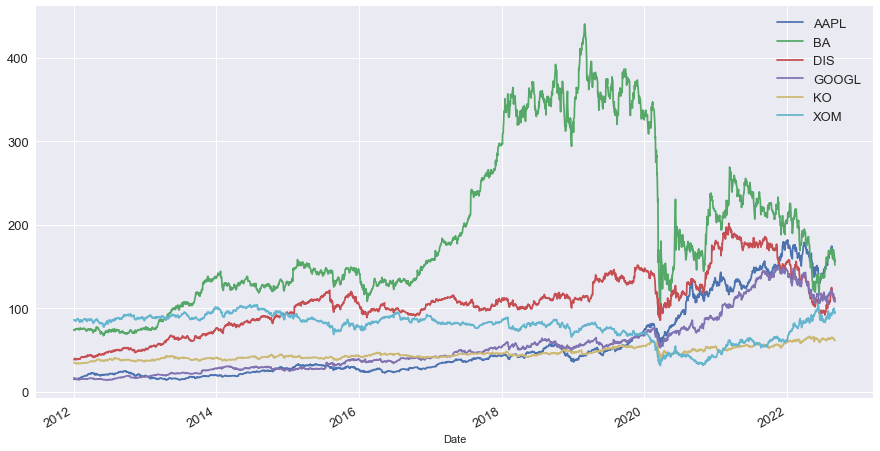

In [18]:
close.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

### Time Series Analysis

A time series is a sequence of data points that occur in successive order over some period of time.
In investing, a time series tracks the movement of the chosen data points, such as a security’s price, over a specified period of time with data points recorded at regular intervals. There is no minimum or maximum amount of time that must be included, allowing the data to be gathered in a way that provides the information being sought by the investor or analyst examining the activity.
Here, We have chosen the close price of the stocks as mentioned above to carry out various forecasting methods.

##### Normalizing Time Series to a Base Value

Normalizing the time series helps us compare the performance of the securities starting at different price levels.

In [19]:
close.head()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-03,14.686786,74.220001,38.310001,16.651901,35.070000,86.000000
2012-01-04,14.765714,74.330002,38.849998,16.723724,34.849998,86.019997
2012-01-05,14.929643,73.529999,39.500000,16.491741,34.685001,85.760002
2012-01-06,15.085714,73.980003,39.910000,16.266768,34.465000,85.120003
2012-01-09,15.061786,74.529999,39.750000,15.577077,34.465000,85.500000


In [20]:
close.iloc[0,0]

14.686785697937012

In [21]:
close.AAPL.div(close.iloc[0,0]).mul(100)

Date
2012-01-03     100.000000
2012-01-04     100.537408
2012-01-05     101.653575
2012-01-06     102.716242
2012-01-09     102.553316
                 ...     
2022-08-29    1098.810919
2022-08-30    1081.993071
2022-08-31    1070.486112
2022-09-01    1075.524692
2022-09-02    1060.885620
Name: AAPL, Length: 2686, dtype: float64

In [22]:
close.iloc[0]

AAPL     14.686786
BA       74.220001
DIS      38.310001
GOOGL    16.651901
KO       35.070000
XOM      86.000000
Name: 2012-01-03 00:00:00, dtype: float64

In [23]:
norm = close.div(close.iloc[0]).mul(100)
norm

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-03,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
2012-01-04,100.537408,100.148209,101.409546,100.431321,99.37268,100.023252
2012-01-05,101.653575,99.070328,103.106235,99.038188,98.90220,99.720933
2012-01-06,102.716242,99.676640,104.176451,97.687149,98.27488,98.976747
2012-01-09,102.553316,100.417674,103.758806,93.545336,98.27488,99.418605
...,...,...,...,...,...,...
2022-08-29,1098.810919,222.877924,296.345588,657.102132,178.87083,116.418608
2022-08-30,1081.993071,218.552956,293.474279,654.219604,177.21700,111.988369
2022-08-31,1070.486112,215.912150,292.560683,649.895766,175.96236,111.151159


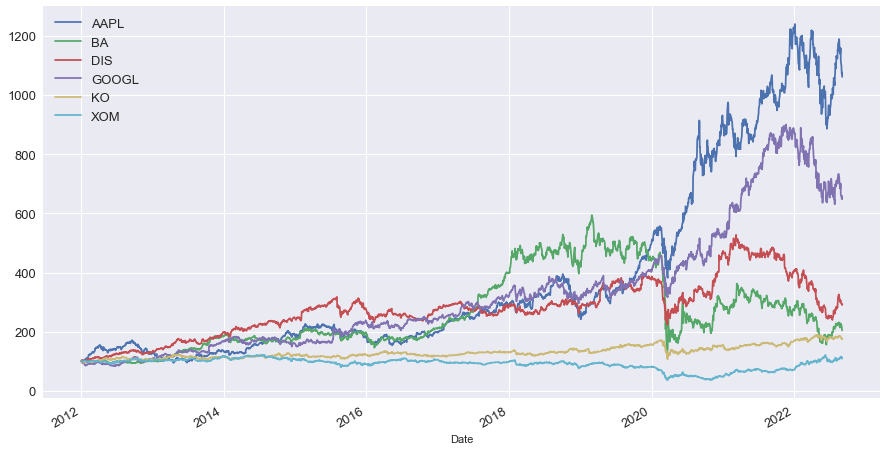

In [24]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

##### Shift method

In [25]:
close.head()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-03,14.686786,74.220001,38.310001,16.651901,35.070000,86.000000
2012-01-04,14.765714,74.330002,38.849998,16.723724,34.849998,86.019997
2012-01-05,14.929643,73.529999,39.500000,16.491741,34.685001,85.760002
2012-01-06,15.085714,73.980003,39.910000,16.266768,34.465000,85.120003
2012-01-09,15.061786,74.529999,39.750000,15.577077,34.465000,85.500000


In [26]:
aapl = close.AAPL.copy().to_frame()

In [27]:
aapl.head()

,AAPL
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [28]:
aapl.shift(periods = 1)

,AAPL
Date,
2012-01-03,NaN
2012-01-04,14.686786
2012-01-05,14.765714
2012-01-06,14.929643
2012-01-09,15.085714
...,...
2022-08-29,163.619995
2022-08-30,161.380005
2022-08-31,158.910004


In [29]:
aapl["lag1"] = aapl.shift(periods = 1)

In [30]:
aapl.head()

,AAPL,lag1
Date,,
2012-01-03,14.686786,NaN
2012-01-04,14.765714,14.686786
2012-01-05,14.929643,14.765714
2012-01-06,15.085714,14.929643
2012-01-09,15.061786,15.085714


In [31]:
aapl.AAPL.sub(aapl.lag1)

Date
2012-01-03         NaN
2012-01-04    0.078928
2012-01-05    0.163929
2012-01-06    0.156072
2012-01-09   -0.023929
                ...   
2022-08-29   -2.239990
2022-08-30   -2.470001
2022-08-31   -1.690002
2022-09-01    0.740005
2022-09-02   -2.150009
Length: 2686, dtype: float64

In [32]:
aapl["Diff"] = aapl.AAPL.sub(aapl.lag1)

In [33]:
aapl.head()

,AAPL,lag1,Diff
Date,,,
2012-01-03,14.686786,NaN,NaN
2012-01-04,14.765714,14.686786,0.078928
2012-01-05,14.929643,14.765714,0.163929
2012-01-06,15.085714,14.929643,0.156072
2012-01-09,15.061786,15.085714,-0.023929


In [34]:
aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

Date
2012-01-03         NaN
2012-01-04    0.537408
2012-01-05    1.110200
2012-01-06    1.045381
2012-01-09   -0.158618
                ...   
2022-08-29   -1.369020
2022-08-30   -1.530550
2022-08-31   -1.063497
2022-09-01    0.470682
2022-09-02   -1.361110
Length: 2686, dtype: float64

In [35]:
aapl["pct_change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

In [36]:
aapl.head()

,AAPL,lag1,Diff,pct_change
Date,,,,
2012-01-03,14.686786,NaN,NaN,NaN
2012-01-04,14.765714,14.686786,0.078928,0.537408
2012-01-05,14.929643,14.765714,0.163929,1.110200
2012-01-06,15.085714,14.929643,0.156072,1.045381
2012-01-09,15.061786,15.085714,-0.023929,-0.158618


##### Monthly Percentage Change

In [37]:
aapl.AAPL.resample("BM").last().pct_change(periods =1).mul(100)

Date
2012-01-31          NaN
2012-02-29    18.831054
2012-03-30    10.528361
2012-04-30    -2.596951
2012-05-31    -1.070237
                ...    
2022-05-31    -5.588327
2022-06-30    -8.142969
2022-07-29    18.863365
2022-08-31    -3.255180
2022-09-30    -0.896835
Freq: BM, Name: AAPL, Length: 129, dtype: float64

### Measuring Stock Returns with Mean and Standard Deviation

In [38]:
aapl = close.AAPL.copy().to_frame()

In [39]:
aapl.head()

,AAPL
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [40]:
aapl.pct_change().dropna()

,AAPL
Date,
2012-01-04,0.005374
2012-01-05,0.011102
2012-01-06,0.010454
2012-01-09,-0.001586
2012-01-10,0.003580
...,...
2022-08-29,-0.013690
2022-08-30,-0.015305
2022-08-31,-0.010635


In [41]:
ret = aapl.pct_change().dropna()
ret.head()

,AAPL
Date,
2012-01-04,0.005374
2012-01-05,0.011102
2012-01-06,0.010454
2012-01-09,-0.001586
2012-01-10,0.003580


In [42]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2685 entries, 2012-01-04 to 2022-09-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2685 non-null   float64
dtypes: float64(1)
memory usage: 42.0 KB


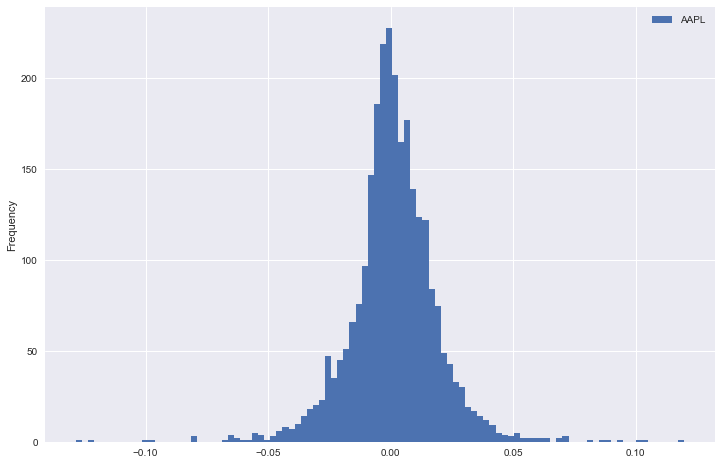

In [43]:
ret.plot(kind = "hist", figsize = (12 ,8), bins = 100)
plt.show()

In [44]:
daily_mean_Return = ret.mean()
daily_mean_Return

AAPL    0.001044
dtype: float64

In [45]:
var_daily_Returns = ret.var()
var_daily_Returns

AAPL    0.000328
dtype: float64

In [46]:
std_daily_Returns = np.sqrt(var_daily_Returns)
std_daily_Returns

AAPL    0.0181
dtype: float64

In [47]:
ret.std()

AAPL    0.0181
dtype: float64

In [48]:
ann_mean_Return = ret.mean() * 252
ann_mean_Return

AAPL    0.263086
dtype: float64

In [49]:
ann_var_Returns = ret.var() * 252
ann_var_Returns

AAPL    0.082553
dtype: float64

In [50]:
ann_std_Returns = np.sqrt(ann_var_Returns)
ann_std_Returns

AAPL    0.287321
dtype: float64

In [51]:
ret.std() * np.sqrt(252)

AAPL    0.287321
dtype: float64

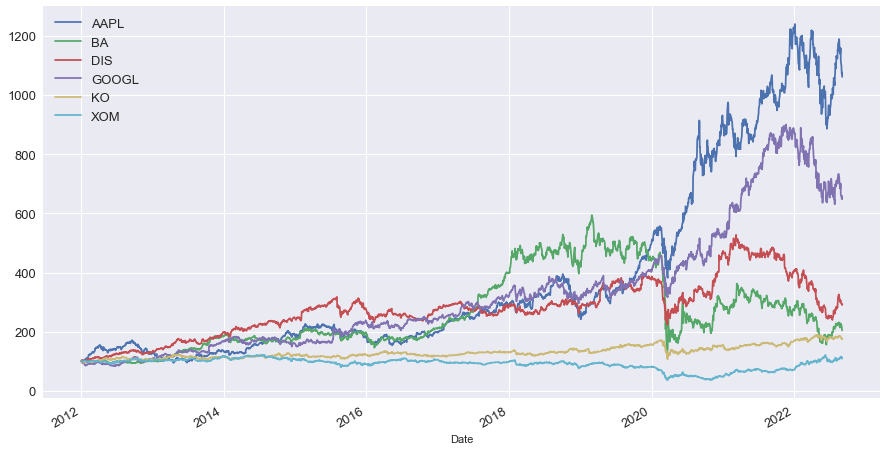

In [52]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [53]:
close.head()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-03,14.686786,74.220001,38.310001,16.651901,35.070000,86.000000
2012-01-04,14.765714,74.330002,38.849998,16.723724,34.849998,86.019997
2012-01-05,14.929643,73.529999,39.500000,16.491741,34.685001,85.760002
2012-01-06,15.085714,73.980003,39.910000,16.266768,34.465000,85.120003
2012-01-09,15.061786,74.529999,39.750000,15.577077,34.465000,85.500000


In [54]:
close.pct_change().dropna()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-04,0.005374,0.001482,0.014095,0.004313,-0.006273,0.000233
2012-01-05,0.011102,-0.010763,0.016731,-0.013872,-0.004734,-0.003022
2012-01-06,0.010454,0.006120,0.010380,-0.013642,-0.006343,-0.007463
2012-01-09,-0.001586,0.007434,-0.004009,-0.042399,0.000000,0.004464
2012-01-10,0.003580,0.006306,-0.003019,0.001092,0.005948,0.002573
...,...,...,...,...,...,...
2022-08-29,-0.013690,0.005409,-0.004734,-0.008338,-0.006021,0.022990
2022-08-30,-0.015305,-0.019405,-0.009689,-0.004387,-0.009246,-0.038054
2022-08-31,-0.010635,-0.012083,-0.003113,-0.006609,-0.007080,-0.007476


In [55]:
ret = close.pct_change().dropna()

In [56]:
ret.head()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-04,0.005374,0.001482,0.014095,0.004313,-0.006273,0.000233
2012-01-05,0.011102,-0.010763,0.016731,-0.013872,-0.004734,-0.003022
2012-01-06,0.010454,0.006120,0.010380,-0.013642,-0.006343,-0.007463
2012-01-09,-0.001586,0.007434,-0.004009,-0.042399,0.000000,0.004464
2012-01-10,0.003580,0.006306,-0.003019,0.001092,0.005948,0.002573


In [57]:
ret.describe().T.loc[:, ["mean", "std"]]

,mean,std
AAPL,0.001044,0.018100
BA,0.000544,0.023534
DIS,0.000522,0.015823
GOOGL,0.000832,0.016509
KO,0.000270,0.011192
XOM,0.000172,0.016298


In [58]:
summary = ret.describe().T.loc[:, ["mean", "std"]]
summary

,mean,std
AAPL,0.001044,0.018100
BA,0.000544,0.023534
DIS,0.000522,0.015823
GOOGL,0.000832,0.016509
KO,0.000270,0.011192
XOM,0.000172,0.016298


In [59]:
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"] * np.sqrt(252)

In [60]:
summary

,mean,std
AAPL,0.263086,0.287321
BA,0.137036,0.373594
DIS,0.131439,0.251176
GOOGL,0.209584,0.262068
KO,0.068055,0.177674
XOM,0.043392,0.258722


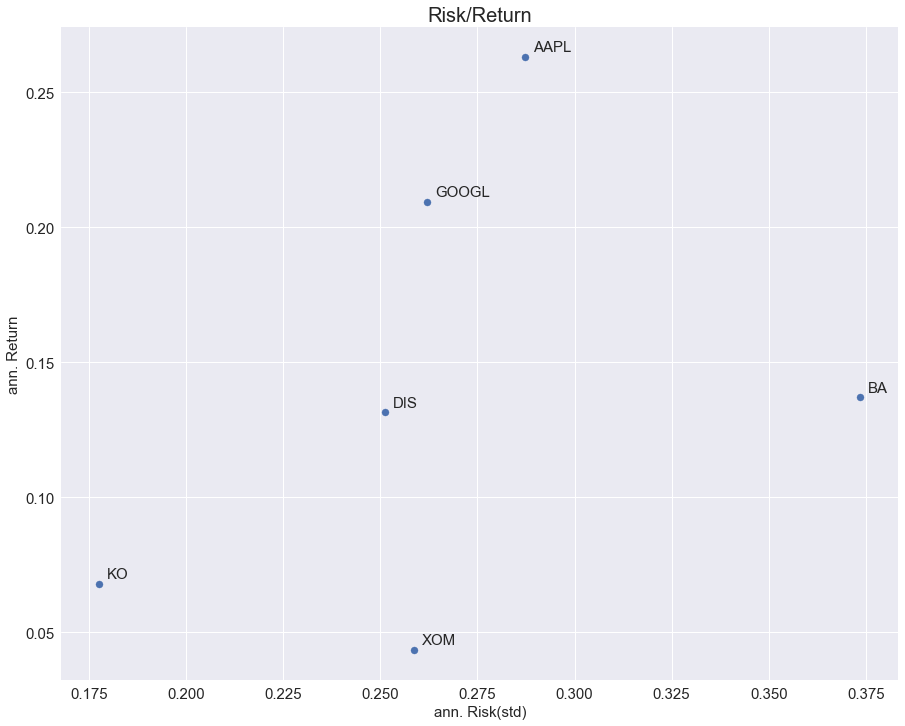

In [61]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

### Covariance and Correlation

In [62]:
ret.head()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-04,0.005374,0.001482,0.014095,0.004313,-0.006273,0.000233
2012-01-05,0.011102,-0.010763,0.016731,-0.013872,-0.004734,-0.003022
2012-01-06,0.010454,0.006120,0.010380,-0.013642,-0.006343,-0.007463
2012-01-09,-0.001586,0.007434,-0.004009,-0.042399,0.000000,0.004464
2012-01-10,0.003580,0.006306,-0.003019,0.001092,0.005948,0.002573


In [63]:
ret.cov()

,AAPL,BA,DIS,GOOGL,KO,XOM
AAPL,0.000328,0.000161,0.000113,0.000162,0.000066,0.000088
BA,0.000161,0.000554,0.000192,0.000152,0.000108,0.000190
DIS,0.000113,0.000192,0.000250,0.000118,0.000077,0.000116
GOOGL,0.000162,0.000152,0.000118,0.000273,0.000066,0.000091
KO,0.000066,0.000108,0.000077,0.000066,0.000125,0.000076
XOM,0.000088,0.000190,0.000116,0.000091,0.000076,0.000266


In [64]:
ret.corr()

,AAPL,BA,DIS,GOOGL,KO,XOM
AAPL,1.000000,0.378841,0.393150,0.542308,0.327105,0.298812
BA,0.378841,1.000000,0.515491,0.391357,0.408985,0.494624
DIS,0.393150,0.515491,1.000000,0.450208,0.436721,0.450592
GOOGL,0.542308,0.391357,0.450208,1.000000,0.355457,0.339422
KO,0.327105,0.408985,0.436721,0.355457,1.000000,0.415787
XOM,0.298812,0.494624,0.450592,0.339422,0.415787,1.000000


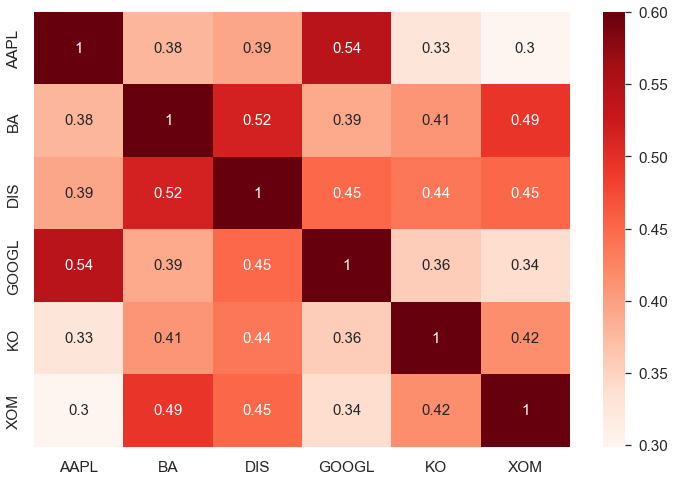

In [65]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), cmap = "Reds", annot = True, annot_kws={"size":15}, vmax = 0.6)
plt.show()

### Simple Returns vs Log Returns

In [66]:
df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ["Price"])

In [67]:
df

,Price
2016,100
2017,50
2018,95


In [68]:
simple_returns = df.pct_change().dropna()
simple_returns

,Price
2017,-0.5
2018,0.9


In [69]:
simple_returns.mean()

Price    0.2
dtype: float64

In [70]:
100 * 1.2 * 1.2

144.0

In [71]:
df

,Price
2016,100
2017,50
2018,95


In [72]:
np.log(df / df.shift(1))

,Price
2016,NaN
2017,-0.693147
2018,0.641854


In [73]:
log_returns = np.log(df / df.shift(1)).dropna()

In [74]:
log_returns

,Price
2017,-0.693147
2018,0.641854


In [75]:
log_returns.mean()

Price   -0.025647
dtype: float64

In [76]:
100 * np.exp(2 * log_returns.mean())

Price    95.0
dtype: float64

### Simple Moving Averages

In [77]:
SP500 = yf.download("^GSPC", start = "2012-01-01", end = "2022-09-06")

[*********************100%***********************]  1 of 1 completed


In [78]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


In [79]:
SP500.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-29,4034.580078,4062.989990,4017.419922,4030.610107,4030.610107,2963020000
2022-08-30,4041.250000,4044.979980,3965.209961,3986.159912,3986.159912,3190580000
2022-08-31,4000.669922,4015.370117,3954.530029,3955.000000,3955.000000,3797860000
2022-09-01,3936.729980,3970.229980,3903.649902,3966.850098,3966.850098,3754570000
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,3924.260010,4134920000


In [80]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2686 entries, 2012-01-03 to 2022-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2686 non-null   float64
 1   High       2686 non-null   float64
 2   Low        2686 non-null   float64
 3   Close      2686 non-null   float64
 4   Adj Close  2686 non-null   float64
 5   Volume     2686 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 146.9 KB


In [81]:
SP500 = SP500.Close.to_frame()

In [82]:
SP500.head()

,Close
Date,
2012-01-03,1277.060059
2012-01-04,1277.300049
2012-01-05,1281.060059
2012-01-06,1277.810059
2012-01-09,1280.699951


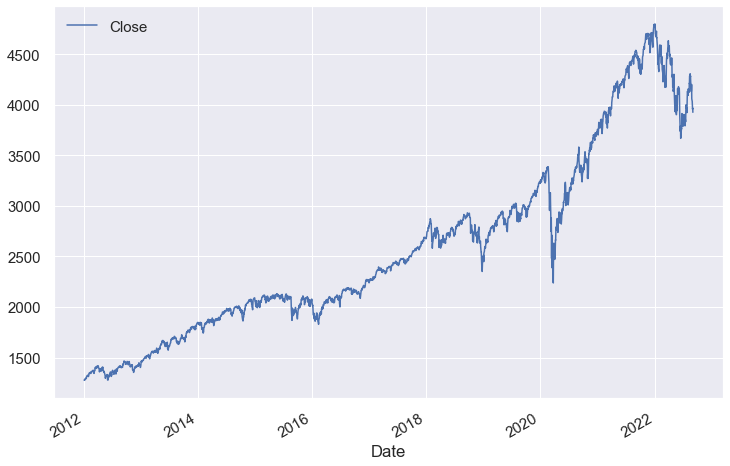

In [83]:
SP500.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [84]:
SP500.rolling(window = 10)

Rolling [window=10,center=False,axis=0,method=single]

In [85]:
type(SP500.rolling(window = 10))

pandas.core.window.rolling.Rolling

In [86]:
SP500.head(15)

,Close
Date,
2012-01-03,1277.060059
2012-01-04,1277.300049
2012-01-05,1281.060059
2012-01-06,1277.810059
2012-01-09,1280.699951
2012-01-10,1292.079956
2012-01-11,1292.479980
2012-01-12,1295.500000
2012-01-13,1289.089966


In [87]:
SP500.rolling(window = 10).mean()

,Close
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,NaN
...,...
2022-08-29,4178.634082
2022-08-30,4146.730054
2022-08-31,4114.826050


In [88]:
SP500.rolling(window = 10).median()

,Close
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,NaN
...,...
2022-08-29,4169.945068
2022-08-30,4139.380127
2022-08-31,4133.360107


In [89]:
SP500.rolling(window = 10, min_periods=5).mean()

,Close
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,1278.786035
...,...
2022-08-29,4178.634082
2022-08-30,4146.730054
2022-08-31,4114.826050


In [90]:
SP500["SMA50"] = SP500.rolling(window = 50, min_periods=50).mean()

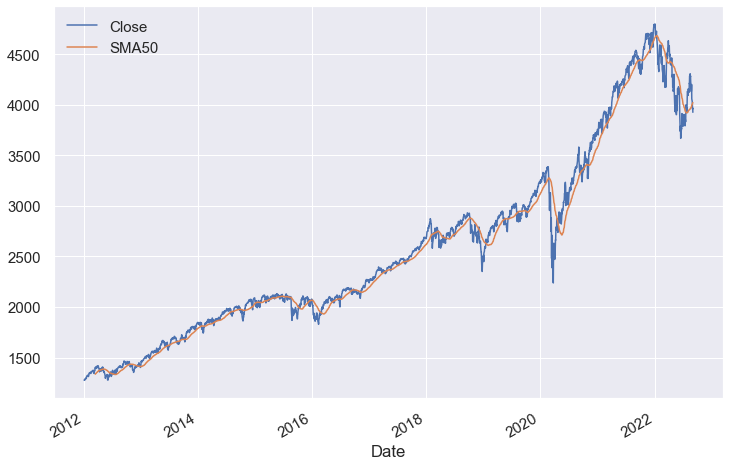

In [91]:
SP500.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [92]:
SP500["SMA200"] = SP500.Close.rolling(window = 200).mean()

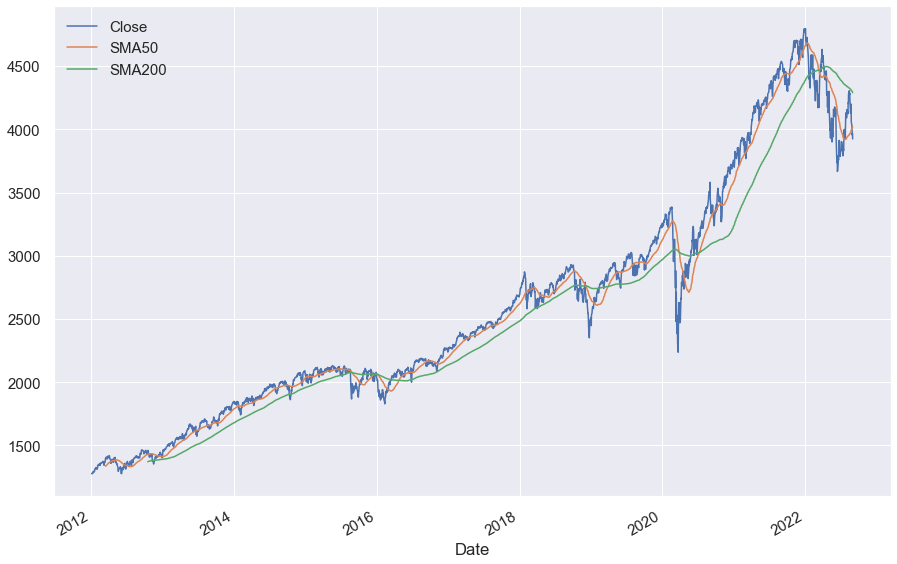

In [93]:
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

### Simple SMA Strategy

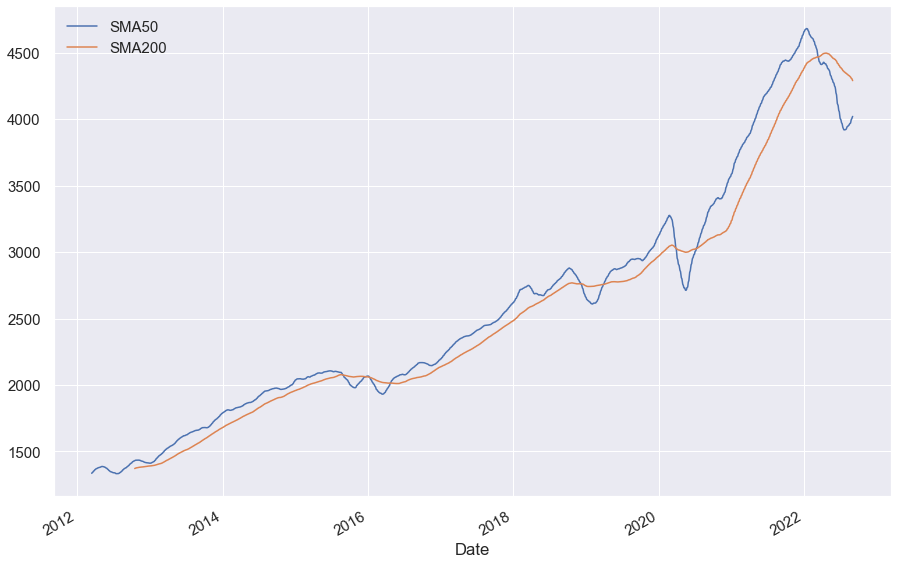

In [94]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

### Exponentially weighted moving average

In [95]:
SP500["SMA"] = SP500.Close.rolling(window = 100).mean()
SP500["EMA"] = SP500.Close.ewm(span = 100, min_periods= 100).mean()

In [96]:
SP500

,Close,SMA50,SMA200,SMA,EMA
Date,,,,,
2012-01-03,1277.060059,NaN,NaN,NaN,NaN
2012-01-04,1277.300049,NaN,NaN,NaN,NaN
2012-01-05,1281.060059,NaN,NaN,NaN,NaN
2012-01-06,1277.810059,NaN,NaN,NaN,NaN
2012-01-09,1280.699951,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-08-29,4030.610107,4003.464819,4303.973809,4068.381211,4113.423817
2022-08-30,3986.159912,4009.691216,4300.658258,4063.431311,4110.903740
2022-08-31,3955.000000,4013.495415,4297.019008,4057.979211,4107.816537


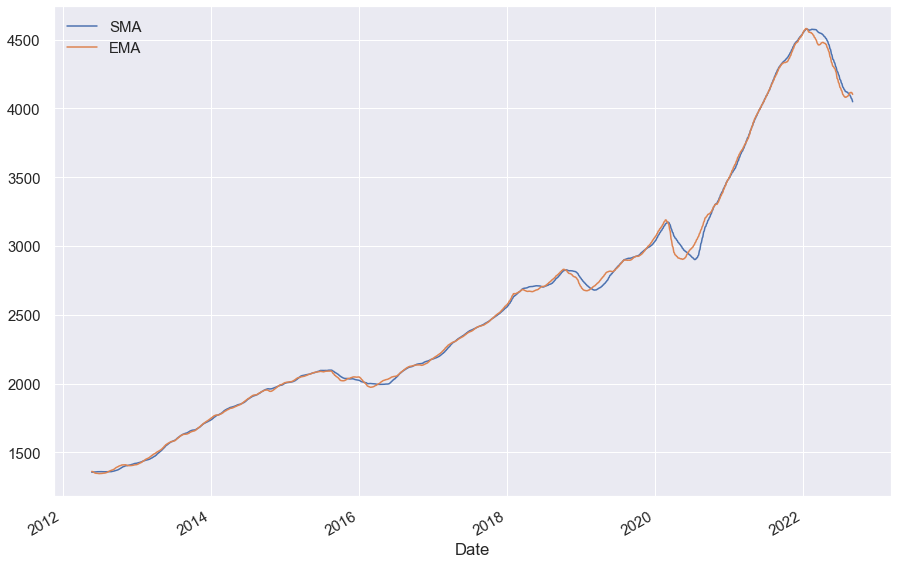

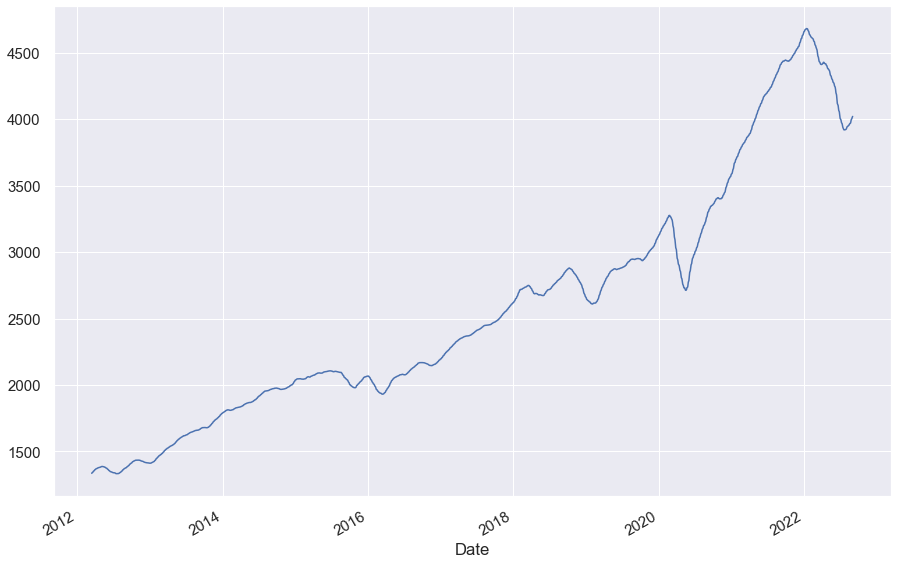

In [97]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize =15)

plt.legend(fontsize = 15)
plt.show()

SP500.iloc[:,1].plot(figsize = (15,10), fontsize =15)
plt.show()

## Lecture 2 : SMA Strategy and Backtesting

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [99]:
GBPUSD = yf.download("GBPUSD=X", start = "2006-01-01", end = "2022-09-06")

[*********************100%***********************]  1 of 1 completed


In [100]:
df = pd.DataFrame()
df["price"] = GBPUSD["Close"]

In [101]:
df

,price
Date,
2006-01-02,1.719188
2006-01-03,1.748588
2006-01-04,1.757315
2006-01-05,1.755310
2006-01-06,1.770789
...,...
2022-08-30,1.172251
2022-08-31,1.165977
2022-09-01,1.159851


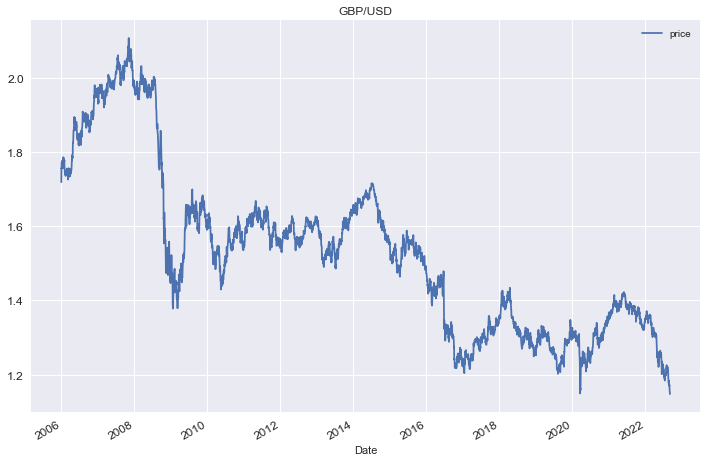

In [102]:
df.plot(figsize = (12, 8), title = "GBP/USD", fontsize = 12)
plt.show()

In [103]:
df["returns"] = np.emath.log(df.div(df.shift(1)))

In [104]:
df

,price,returns
Date,,
2006-01-02,1.719188,NaN
2006-01-03,1.748588,0.016957
2006-01-04,1.757315,0.004978
2006-01-05,1.755310,-0.001142
2006-01-06,1.770789,0.008780
...,...,...
2022-08-30,1.172251,0.002389
2022-08-31,1.165977,-0.005366
2022-09-01,1.159851,-0.005268


### A Simple Buy and Hold Strategy

In [105]:
df = df.fillna(0)

In [106]:
df

,price,returns
Date,,
2006-01-02,1.719188,0.000000
2006-01-03,1.748588,0.016957
2006-01-04,1.757315,0.004978
2006-01-05,1.755310,-0.001142
2006-01-06,1.770789,0.008780
...,...,...
2022-08-30,1.172251,0.002389
2022-08-31,1.165977,-0.005366
2022-09-01,1.159851,-0.005268


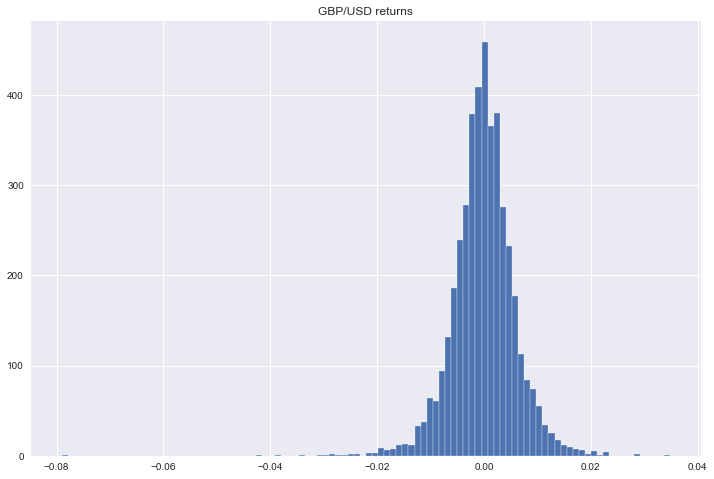

In [107]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("GBP/USD returns")
plt.show()

In [108]:
df.returns.sum()

-0.4043011086569208

In [109]:
np.exp(df.returns.sum())

0.6674431181076872

In [110]:
df.price[-1] / df.price[0]

0.6674431181076875

In [111]:
df.returns.cumsum().apply(np.exp)

Date
2006-01-02    1.000000
2006-01-03    1.017101
2006-01-04    1.022177
2006-01-05    1.021011
2006-01-06    1.030015
                ...   
2022-08-30    0.681863
2022-08-31    0.678214
2022-09-01    0.674650
2022-09-02    0.671767
2022-09-05    0.667443
Name: returns, Length: 4336, dtype: float64

In [112]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

df

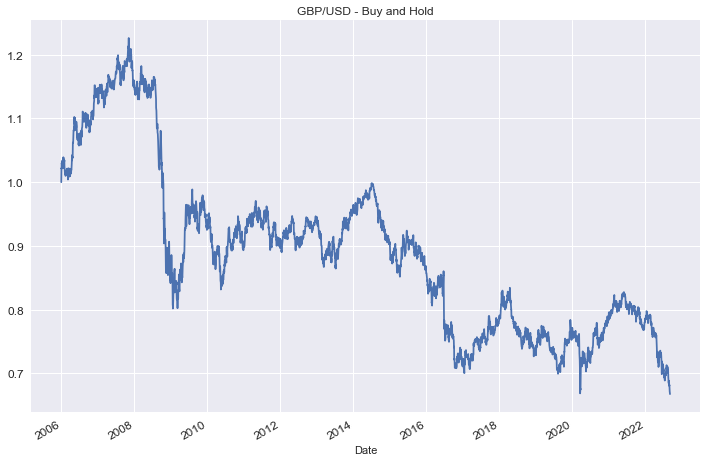

In [113]:
df.creturns.plot(figsize = (12, 8), title = "GBP/USD - Buy and Hold", fontsize = 12)
plt.show()

### Performance metrics

In [114]:
df.creturns.iloc[-1] # absolute Performance 

0.6674431181076873

In [115]:
df.returns.sum() # absolute Performance

-0.4043011086569208

In [116]:
df.returns.mean() * 252 # mean return

-0.023497204654415127

In [117]:
df.returns.std() * np.sqrt(252) # risk

0.09467580158097609

In [118]:
df["cummax"] = df.creturns.cummax()

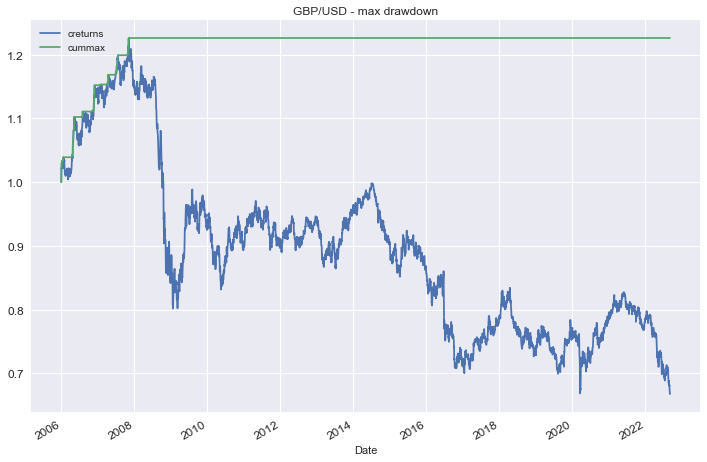

In [119]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "GBP/USD - max drawdown", fontsize = 12)
plt.show()

In [120]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2006-01-02    0.000000
2006-01-03    0.000000
2006-01-04    0.000000
2006-01-05    0.001166
2006-01-06    0.000000
                ...   
2022-08-30    0.544409
2022-08-31    0.548059
2022-09-01    0.551622
2022-09-02    0.554505
2022-09-05    0.558829
Length: 4336, dtype: float64

In [121]:
drawdown.max() # maximum drawdown

0.558829180659861

### Defining an SMA strategy


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [123]:
GBPUSD = yf.download("GBPUSD=x", start = "2006-01-01", end = "2022-09-06")
GBPUSD

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-02,1.721704,1.725209,1.719188,1.719188,1.719188,0
2006-01-03,1.719010,1.748894,1.719010,1.748588,1.748588,0
2006-01-04,1.747702,1.761090,1.746786,1.757315,1.757315,0
2006-01-05,1.757315,1.758798,1.749200,1.755310,1.755310,0
2006-01-06,1.755310,1.772107,1.751989,1.770789,1.770789,0
...,...,...,...,...,...,...
2022-08-30,1.172127,1.175807,1.162304,1.172251,1.172251,0
2022-08-31,1.166086,1.169454,1.160025,1.165977,1.165977,0
2022-09-01,1.159689,1.161710,1.150324,1.159851,1.159851,0


In [124]:
data = pd.DataFrame()
data["price"] = GBPUSD["Close"]

In [125]:
sma_s = 50
sma_l = 200

In [126]:
data.price.rolling(50).mean()

Date
2006-01-02         NaN
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
                ...   
2022-08-30    1.203701
2022-08-31    1.202487
2022-09-01    1.201183
2022-09-02    1.199759
2022-09-05    1.198143
Name: price, Length: 4336, dtype: float64

In [127]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [128]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [129]:
data

,price,SMA_S,SMA_L
Date,,,
2006-01-02,1.719188,NaN,NaN
2006-01-03,1.748588,NaN,NaN
2006-01-04,1.757315,NaN,NaN
2006-01-05,1.755310,NaN,NaN
2006-01-06,1.770789,NaN,NaN
...,...,...,...
2022-08-30,1.172251,1.203701,1.282586
2022-08-31,1.165977,1.202487,1.281728
2022-09-01,1.159851,1.201183,1.280861


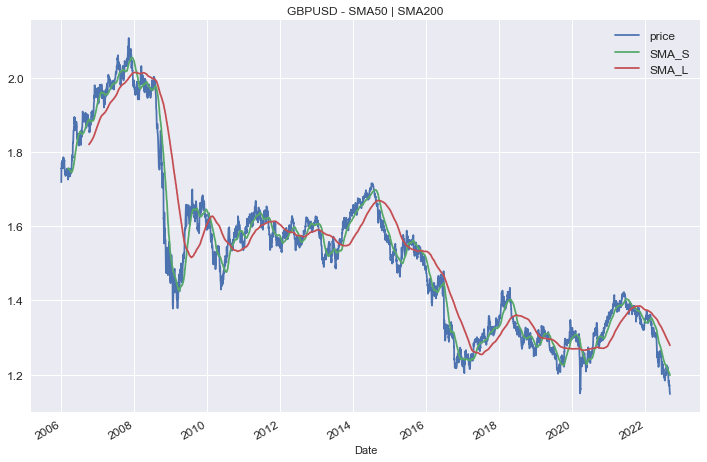

In [130]:
data.plot(figsize = (12, 8), title = "GBPUSD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [131]:
data.dropna(inplace = True)

In [132]:
data

,price,SMA_S,SMA_L
Date,,,
2006-10-06,1.871293,1.888513,1.820959
2006-10-09,1.867483,1.888498,1.821700
2006-10-10,1.853603,1.888050,1.822225
2006-10-11,1.854840,1.887585,1.822713
2006-10-12,1.859496,1.887031,1.823234
...,...,...,...
2022-08-30,1.172251,1.203701,1.282586
2022-08-31,1.165977,1.202487,1.281728
2022-09-01,1.159851,1.201183,1.280861


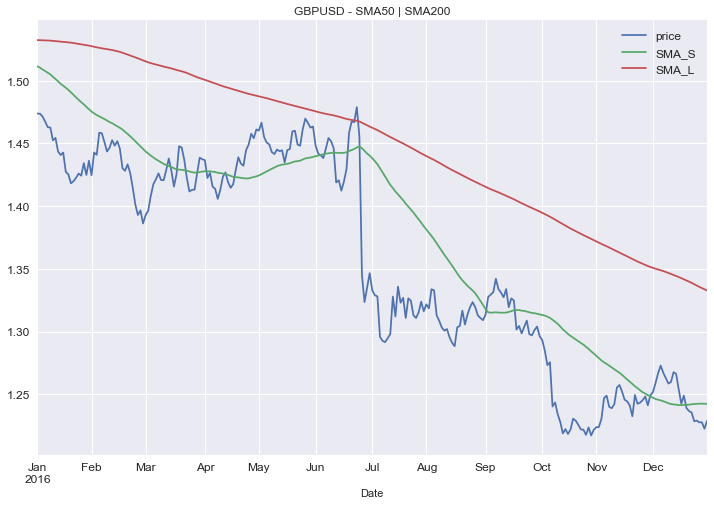

In [133]:
data.loc["2016"].plot(figsize = (12, 8), title = "GBPUSD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [134]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [135]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2006-10-06,1.871293,1.888513,1.820959,1
2006-10-09,1.867483,1.888498,1.821700,1
2006-10-10,1.853603,1.888050,1.822225,1
2006-10-11,1.854840,1.887585,1.822713,1
2006-10-12,1.859496,1.887031,1.823234,1
...,...,...,...,...
2022-08-30,1.172251,1.203701,1.282586,-1
2022-08-31,1.165977,1.202487,1.281728,-1
2022-09-01,1.159851,1.201183,1.280861,-1


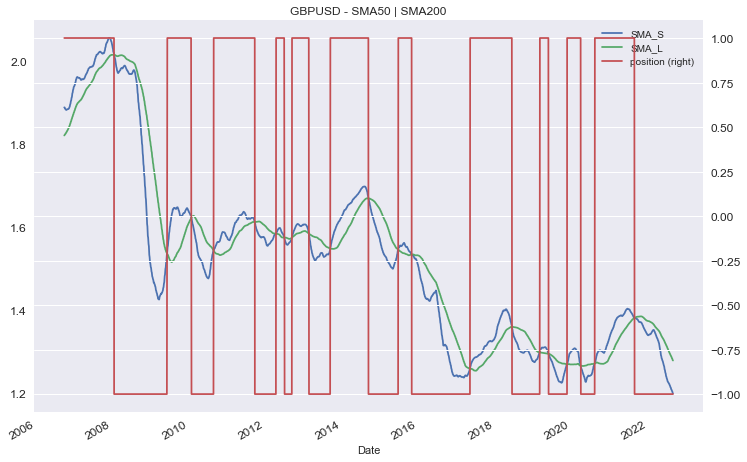

In [136]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "GBPUSD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

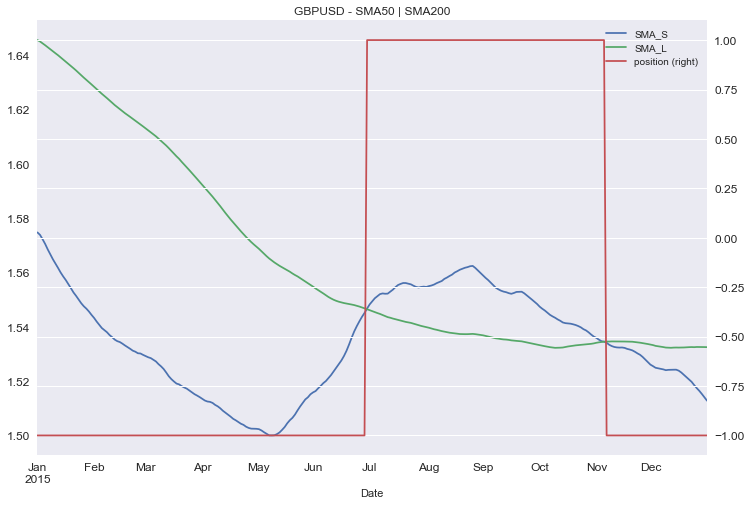

In [137]:
data.loc["2015", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "GBPUSD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

### Vectorized Strategy Backtesting

In [138]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2006-10-06,1.871293,1.888513,1.820959,1
2006-10-09,1.867483,1.888498,1.821700,1
2006-10-10,1.853603,1.888050,1.822225,1
2006-10-11,1.854840,1.887585,1.822713,1
2006-10-12,1.859496,1.887031,1.823234,1
...,...,...,...,...
2022-08-30,1.172251,1.203701,1.282586,-1
2022-08-31,1.165977,1.202487,1.281728,-1
2022-09-01,1.159851,1.201183,1.280861,-1


In [139]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [140]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [141]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2006-10-06,1.871293,1.888513,1.820959,1,NaN,NaN
2006-10-09,1.867483,1.888498,1.821700,1,-0.002038,-0.002038
2006-10-10,1.853603,1.888050,1.822225,1,-0.007461,-0.007461
2006-10-11,1.854840,1.887585,1.822713,1,0.000668,0.000668
2006-10-12,1.859496,1.887031,1.823234,1,0.002507,0.002507
...,...,...,...,...,...,...
2022-08-30,1.172251,1.203701,1.282586,-1,0.002389,-0.002389
2022-08-31,1.165977,1.202487,1.281728,-1,-0.005366,0.005366
2022-09-01,1.159851,1.201183,1.280861,-1,-0.005268,0.005268


In [142]:
data.dropna(inplace = True)

In [143]:
data[["returns", "strategy"]].sum() # absolute performance

returns    -0.489079
strategy    0.299349
dtype: float64

In [144]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     0.613191
strategy    1.348980
dtype: float64

In [145]:
data[["returns", "strategy"]].mean() * 252 # annualized return

returns    -0.029799
strategy    0.018239
dtype: float64

In [146]:
data[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.095381
strategy    0.095392
dtype: float64

In [147]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [148]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2006-10-09,1.867483,1.888498,1.821700,1,-0.002038,-0.002038,0.997964,0.997964
2006-10-10,1.853603,1.888050,1.822225,1,-0.007461,-0.007461,0.990547,0.990547
2006-10-11,1.854840,1.887585,1.822713,1,0.000668,0.000668,0.991208,0.991208
2006-10-12,1.859496,1.887031,1.823234,1,0.002507,0.002507,0.993696,0.993696
2006-10-13,1.855184,1.885939,1.823656,1,-0.002322,-0.002322,0.991392,0.991392
...,...,...,...,...,...,...,...,...
2022-08-30,1.172251,1.203701,1.282586,-1,0.002389,-0.002389,0.626439,1.320452
2022-08-31,1.165977,1.202487,1.281728,-1,-0.005366,0.005366,0.623086,1.327557
2022-09-01,1.159851,1.201183,1.280861,-1,-0.005268,0.005268,0.619813,1.334569


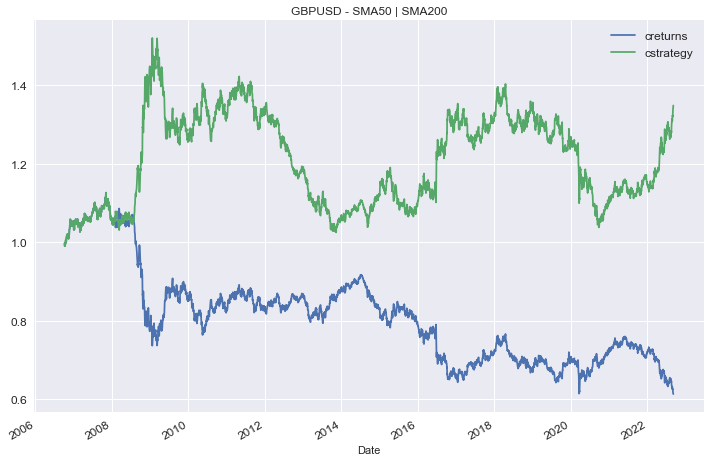

In [149]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "GBPUSD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [150]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

0.7357886311094528

### Finding the Optimal SMA Strategy

In [151]:
GBPUSD = yf.download("GBPUSD=x", start = "2006-01-01", end = "2022-09-06")
GBPUSD

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-02,1.721704,1.725209,1.719188,1.719188,1.719188,0
2006-01-03,1.719010,1.748894,1.719010,1.748588,1.748588,0
2006-01-04,1.747702,1.761090,1.746786,1.757315,1.757315,0
2006-01-05,1.757315,1.758798,1.749200,1.755310,1.755310,0
2006-01-06,1.755310,1.772107,1.751989,1.770789,1.770789,0
...,...,...,...,...,...,...
2022-08-30,1.172127,1.175807,1.162304,1.172251,1.172251,0
2022-08-31,1.166086,1.169454,1.160025,1.165977,1.165977,0
2022-09-01,1.159689,1.161710,1.150324,1.159851,1.159851,0


In [152]:
data = pd.DataFrame()
data["price"] = GBPUSD["Close"]

In [153]:
def test_strategy(SMA):
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return np.exp(data["strategy"].sum())

In [154]:
test_strategy((50, 200))

1.3489798062872187

In [155]:
test_strategy((75, 150))

1.5817621402326825

In [156]:
test_strategy((25, 252))

1.0821956324220587

In [157]:
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [158]:
from itertools import product

In [159]:
list(product(SMA_S_range, SMA_L_range))

[(10, 100),
 (10, 101),
 (10, 102),
 (10, 103),
 (10, 104),
 (10, 105),
 (10, 106),
 (10, 107),
 (10, 108),
 (10, 109),
 (10, 110),
 (10, 111),
 (10, 112),
 (10, 113),
 (10, 114),
 (10, 115),
 (10, 116),
 (10, 117),
 (10, 118),
 (10, 119),
 (10, 120),
 (10, 121),
 (10, 122),
 (10, 123),
 (10, 124),
 (10, 125),
 (10, 126),
 (10, 127),
 (10, 128),
 (10, 129),
 (10, 130),
 (10, 131),
 (10, 132),
 (10, 133),
 (10, 134),
 (10, 135),
 (10, 136),
 (10, 137),
 (10, 138),
 (10, 139),
 (10, 140),
 (10, 141),
 (10, 142),
 (10, 143),
 (10, 144),
 (10, 145),
 (10, 146),
 (10, 147),
 (10, 148),
 (10, 149),
 (10, 150),
 (10, 151),
 (10, 152),
 (10, 153),
 (10, 154),
 (10, 155),
 (10, 156),
 (10, 157),
 (10, 158),
 (10, 159),
 (10, 160),
 (10, 161),
 (10, 162),
 (10, 163),
 (10, 164),
 (10, 165),
 (10, 166),
 (10, 167),
 (10, 168),
 (10, 169),
 (10, 170),
 (10, 171),
 (10, 172),
 (10, 173),
 (10, 174),
 (10, 175),
 (10, 176),
 (10, 177),
 (10, 178),
 (10, 179),
 (10, 180),
 (10, 181),
 (10, 182),
 (10

In [160]:
combinations = list(product(SMA_S_range, SMA_L_range))

In [161]:
len(combinations)

6080

In [162]:
(50-10) * (252-100)

6080

In [163]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))

In [164]:
results

[1.8325354737312671,
 1.4519936861884415,
 1.3096238172778005,
 1.3258217775463996,
 1.3180255340316107,
 1.2535934395084931,
 1.2652275539915956,
 1.3086100096614304,
 1.3340452167846222,
 1.383155331728223,
 1.3748031180438525,
 1.2670763224089785,
 1.36457452852311,
 1.3184701371489496,
 1.2444945346182674,
 1.2018134579465605,
 1.155686453297056,
 1.249586817619014,
 1.0946518508692706,
 1.2737199745497592,
 1.2157820402063952,
 1.1979680341745291,
 1.133750341108163,
 1.0962000571328543,
 1.1667441279960407,
 1.13723694007115,
 1.1834721030170665,
 1.2381776162753493,
 1.1375478284183504,
 1.1406607418348211,
 1.1154730855838828,
 1.0351343548392293,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,


In [165]:
np.max(results)

1.8325354737312671

In [166]:
np.argmax(results)

0

In [167]:
combinations[np.argmax(results)]

(10, 100)

In [168]:
many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
many_results

,SMA_S,SMA_L
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250


In [169]:
many_results["performance"] = results

In [170]:
many_results

,SMA_S,SMA_L,performance
0,10,100,1.832535
1,10,101,1.451994
2,10,102,1.309624
3,10,103,1.325822
4,10,104,1.318026
...,...,...,...
6075,49,247,1.000000
6076,49,248,1.000000
6077,49,249,1.000000
6078,49,250,1.000000


In [171]:
many_results.nlargest(10, "performance")

,SMA_S,SMA_L,performance
0,10,100,1.832535
1,10,101,1.451994
9,10,109,1.383155
10,10,110,1.374803
12,10,112,1.364575
8,10,108,1.334045
3,10,103,1.325822
13,10,113,1.318470
4,10,104,1.318026
2,10,102,1.309624


In [172]:
many_results.nsmallest(10, "performance")

,SMA_S,SMA_L,performance
32,10,132,1.0
33,10,133,1.0
34,10,134,1.0
35,10,135,1.0
36,10,136,1.0
37,10,137,1.0
38,10,138,1.0
39,10,139,1.0
40,10,140,1.0
41,10,141,1.0


### Bollinger Bands Mean Reversion Strategy

__Mean Reversion__: Financial Instruments are from time to time overbought / oversold and revert back to mean prices. 

__Bollinger Bands__: Consists of a SMA (e.g. 30) and Upper and Lower Bands +- (2) Std Dev away from SMA.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [174]:
EURUSD = yf.download("EURUSD=x", start = "2006-01-01", end = "2022-09-06")
data = pd.DataFrame()
data["price"] = EURUSD["Close"]

[*********************100%***********************]  1 of 1 completed


In [175]:
data

,price
Date,
2006-01-02,1.181698
2006-01-03,1.203297
2006-01-04,1.211196
2006-01-05,1.210698
2006-01-06,1.215407
...,...
2022-08-30,1.001402
2022-08-31,1.002506
2022-09-01,1.003905


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4324 entries, 2006-01-02 to 2022-09-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4324 non-null   float64
dtypes: float64(1)
memory usage: 67.6 KB


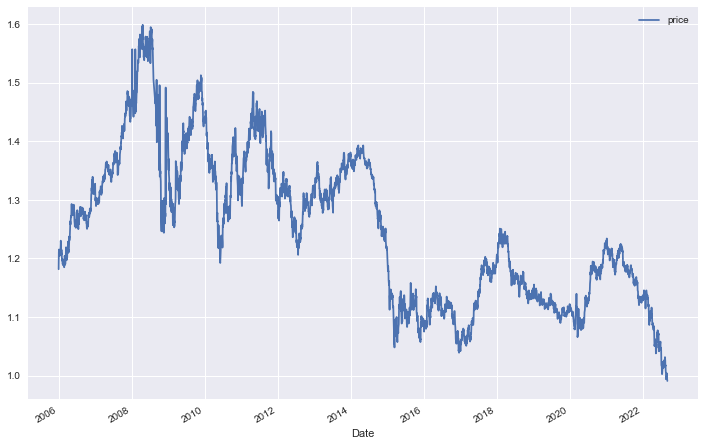

In [177]:
data.plot(figsize = (12, 8))
plt.show()

In [178]:
data["returns"] = np.log(data.div(data.shift(1)))

In [179]:
data

,price,returns
Date,,
2006-01-02,1.181698,NaN
2006-01-03,1.203297,0.018113
2006-01-04,1.211196,0.006543
2006-01-05,1.210698,-0.000412
2006-01-06,1.215407,0.003882
...,...,...
2022-08-30,1.001402,0.007552
2022-08-31,1.002506,0.001102
2022-09-01,1.003905,0.001394


In [180]:
SMA = 30
dev = 2

In [181]:
data["SMA"] = data["price"].rolling(SMA).mean()

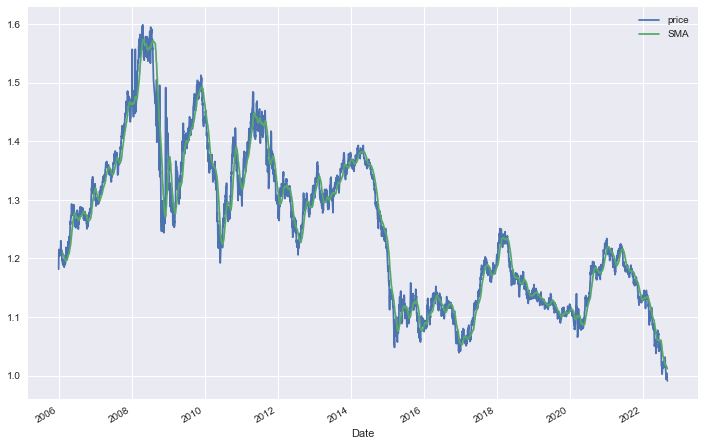

In [182]:
data[["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

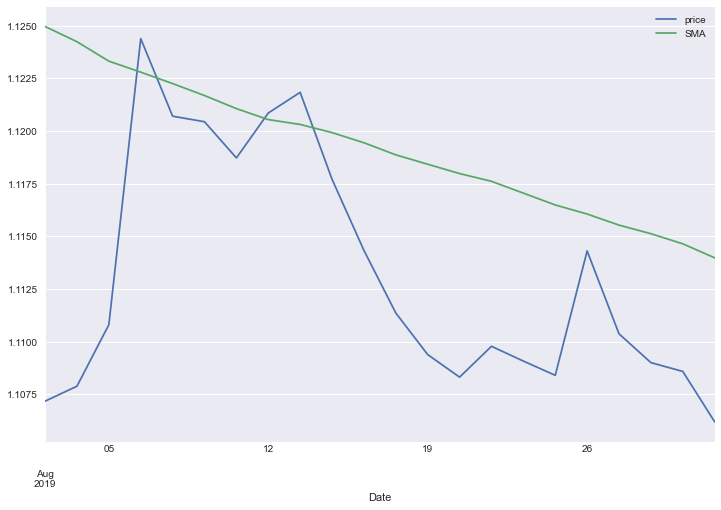

In [183]:
data.loc["2019-08", ["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

In [184]:
data["price"].rolling(SMA).std()

Date
2006-01-02         NaN
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
                ...   
2022-08-30    0.010890
2022-08-31    0.011012
2022-09-01    0.011146
2022-09-02    0.011535
2022-09-05    0.012128
Name: price, Length: 4324, dtype: float64

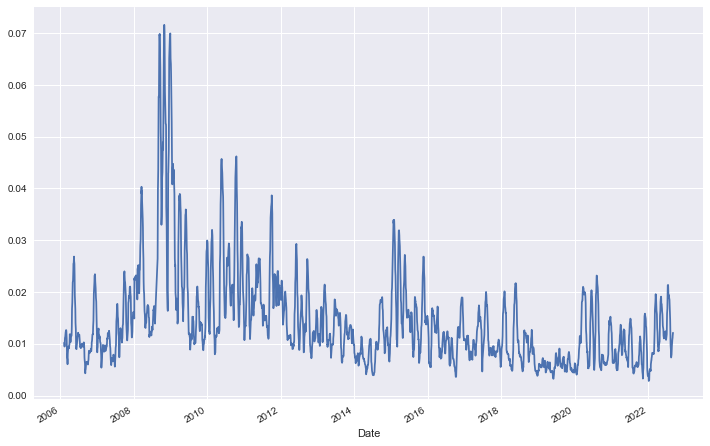

In [185]:
data["price"].rolling(SMA).std().plot(figsize = (12, 8 ))
plt.show()

In [186]:
data["Lower"] = data["SMA"] - data["price"].rolling(SMA).std() * dev # Lower Band -2 Std Dev

In [187]:
data["Upper"] = data["SMA"] + data["price"].rolling(SMA).std() * dev # Upper Band -2 Std Dev

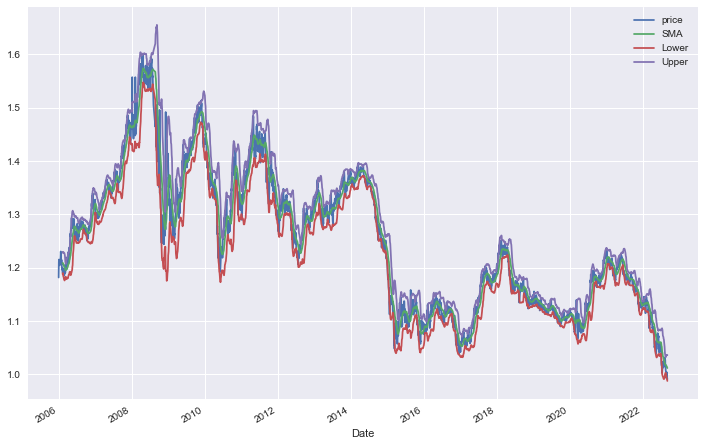

In [188]:
data.drop(columns = "returns").plot(figsize = (12, 8))
plt.show()

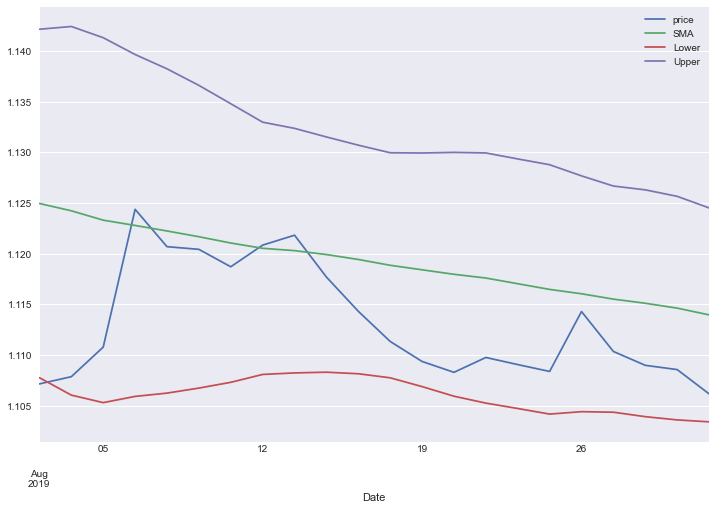

In [189]:
data.drop(columns = "returns").loc["2019-08"].plot(figsize = (12, 8))
plt.show()

In [190]:
data.dropna(inplace = True)

In [191]:
data["distance"] = data.price - data.SMA # helper Column

In [192]:
data["position"] = np.where(data.price < data.Lower, 1, np.nan) # 1. oversold -> go long

In [193]:
data["position"] = np.where(data.price > data.Upper, -1, data["position"]) # 2. overbought -> go short

In [194]:
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])

In [195]:
data["position"] = data.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position

In [196]:
data.position.value_counts()

 0.0    1925
 1.0    1215
-1.0    1155
Name: position, dtype: int64

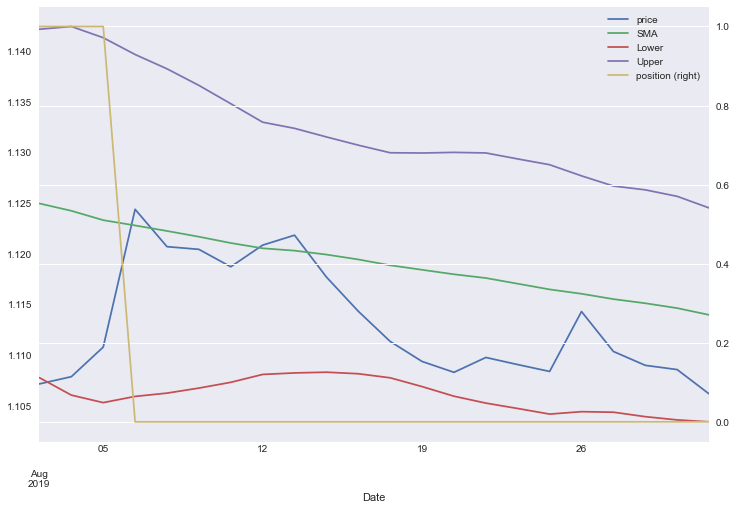

In [197]:
data.drop(columns = ["returns", "distance"]).loc["2019-08"].plot(figsize = (12, 8), secondary_y = "position")
plt.show()

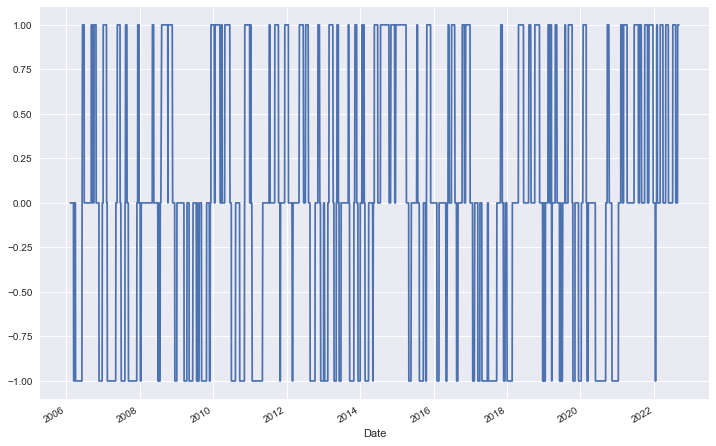

In [198]:
data.position.plot(figsize = (12, 8))
plt.show()

### Strategy Backtesting

In [199]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [200]:
data.dropna(inplace = True)

In [201]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

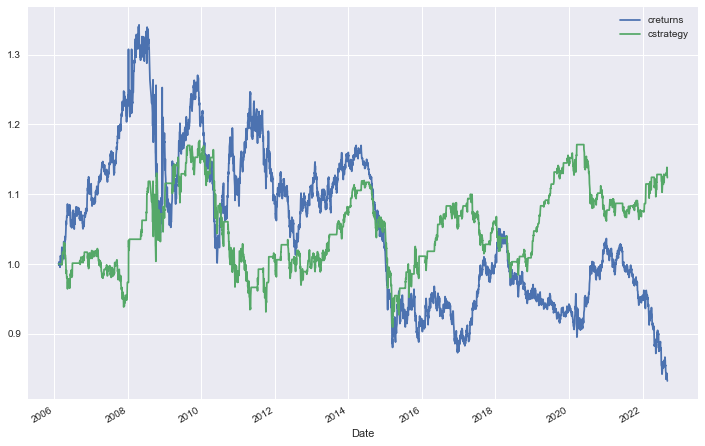

In [202]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [203]:
ptc = 0.00007

In [204]:
data["trades"] = data.position.diff().fillna(0).abs()

In [205]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades
Date,,,,,,,,,,,
2006-02-13,1.191199,0.000417,1.209004,1.190091,1.227916,-0.017804,0.0,0.000000,1.000417,1.000000,0.0
2006-02-14,1.191597,0.000334,1.208613,1.188755,1.228472,-0.017017,0.0,0.000000,1.000751,1.000000,0.0
2006-02-15,1.188594,-0.002523,1.207860,1.186733,1.228987,-0.019266,0.0,-0.000000,0.998229,1.000000,0.0
2006-02-16,1.190703,0.001773,1.207194,1.185193,1.229194,-0.016491,0.0,0.000000,1.000000,1.000000,0.0
2006-02-17,1.194201,0.002933,1.206487,1.184217,1.228756,-0.012286,0.0,0.000000,1.002938,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30,1.001402,0.007552,1.015034,0.993254,1.036814,-0.013632,1.0,0.007552,0.841017,1.135617,0.0
2022-08-31,1.002506,0.001102,1.014347,0.992324,1.036370,-0.011840,1.0,0.001102,0.841945,1.136869,0.0
2022-09-01,1.003905,0.001394,1.013868,0.991575,1.036160,-0.009962,1.0,0.001394,0.843120,1.138455,0.0


In [206]:
data.trades.value_counts()

0.0    4067
1.0     227
Name: trades, dtype: int64

In [207]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [208]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

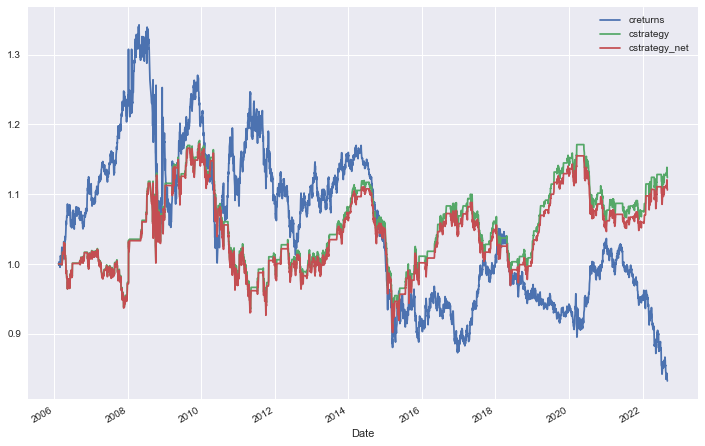

In [209]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [210]:
data[["returns", "strategy_net"]].mean() * (4 * 252) # annualized return

returns        -0.043109
strategy_net    0.023659
dtype: float64

In [211]:
data[["returns", "strategy_net"]].std() * np.sqrt(4 * 252) # annualized risk

returns         0.235323
strategy_net    0.154444
dtype: float64

## Lecture 3 : Time Series Analysis using Machine Learning

### Linear Regression using scikit-learn

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [213]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [214]:
revenue = np.array([2.6, 19. , 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [215]:
df = pd.DataFrame(data = {"revenue":revenue, "budget":budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


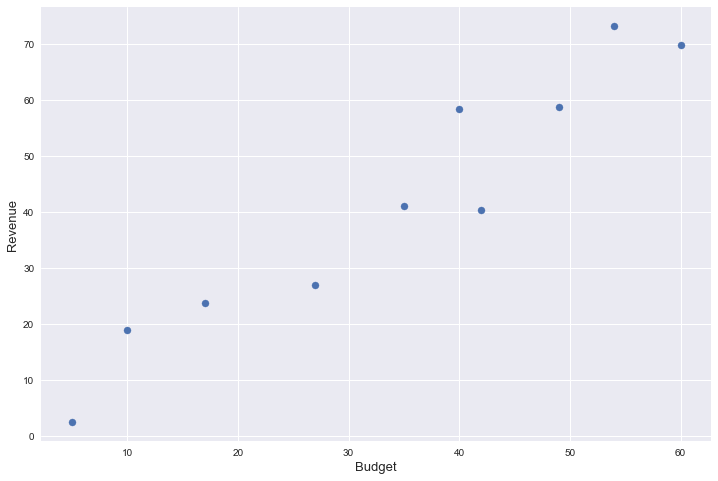

In [216]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

### Linear Relationship between Budget and Revenue

In [219]:
from sklearn.linear_model import LinearRegression

In [220]:
lm = LinearRegression(fit_intercept = True)

In [221]:
lm.fit(X = df.budget.to_frame(), y = df.revenue) # fitting the model (Regression Line)

LinearRegression()

In [222]:
slope = lm.coef_ # slope of Regression Line
slope

array([1.19897684])

In [223]:
intercept = lm.intercept_ # intercept of Regression Line
intercept

0.7046849757673712

In [224]:
df["pred"] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


In [225]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin

In [226]:
y_lin

array([  0.70468498, 120.60236941])

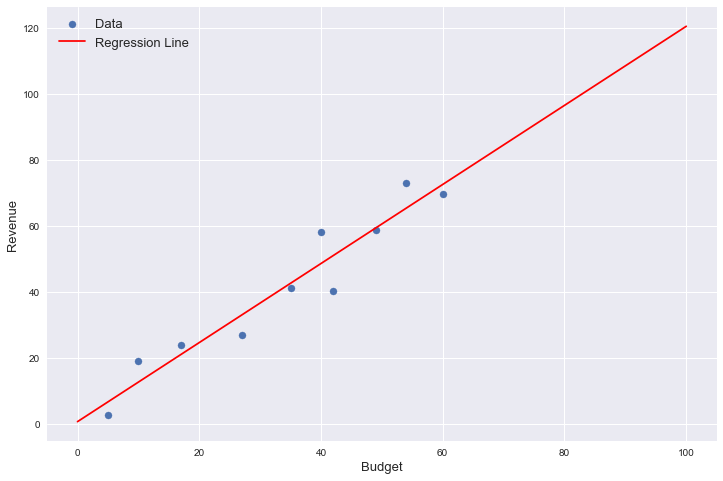

In [227]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

#### Making Predictions with Linear Regression

__new movies (observations/data points)__

In [229]:
budget_new = np.array([63, 66, 74, 80, 85]) 

In [230]:
revenue_new = np.array([74.2,  80.7, 98.2,  94.8, 101.7]) 

In [231]:
df_new = pd.DataFrame(data = {"revenue":revenue_new, "budget":budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,98.2,74
3,94.8,80
4,101.7,85


In [232]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74.2,63,76.240226
1,80.7,66,79.837157
2,98.2,74,89.428971
3,94.8,80,96.622833
4,101.7,85,102.617717


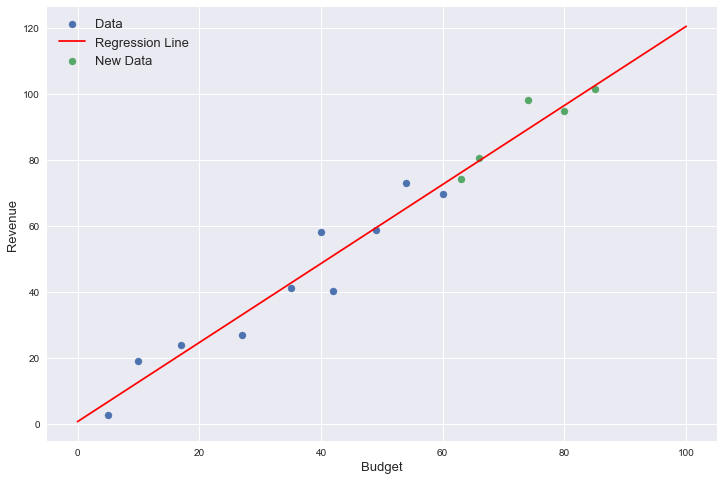

In [233]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

### Overfitting

__Overfitting__: Model performs well on the original (training) dataset, but it does not generalize well to new data (test set).
Overfitting happens when the __model is too complex__ (too many parameters) and detects subtle patterns (noise) in the training set. 

Example: __Polynomial Model__ with degree = 9 (perfect fit)

In [235]:
poly_m = np.polyfit(x = df.budget, y = df.revenue, deg = 9) # polynomial regression (deg = 9)

In [236]:
poly_m # 10 regression parameters (intercept + 9 regression coefficients)

array([ 2.31988761e-09, -6.91663856e-07,  8.80409587e-05, -6.24271101e-03,
        2.69731803e-01, -7.29512945e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254338e+03, -1.21710591e+04])

In [237]:
x_poly = np.linspace(0, 100, 1000) # x values for polynomial regression line/curve

In [238]:
y_poly = np.polyval(poly_m, x_poly) # y values for polynomial regression line/curve

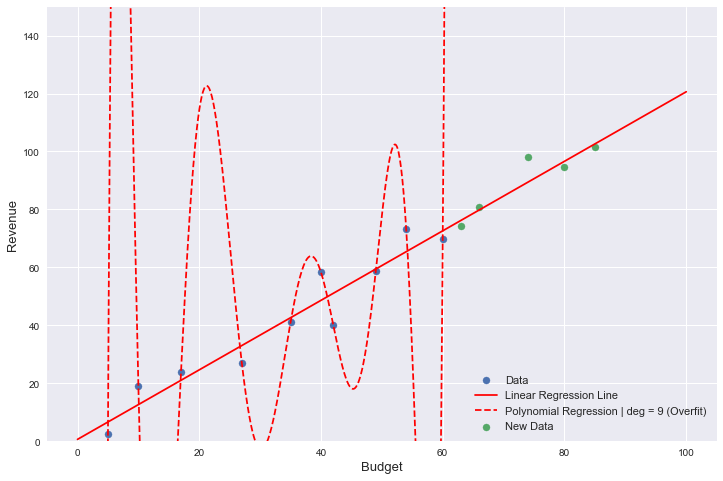

In [239]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

__Solutions__ to overcome overfitting:


- use a __simpler model__ with fewer parameters (linear rather than polynomial)<br>
- more and better data (remove outliers & errors) <br>
- constrain the model -> make the model more simple with __Regularization__

###  Underfitting

__Underfitting__: Model performs neither well on the original (training) dataset, nor does it generalize well to new data (test set).
Underfitting happens when the __model is too simple__ to learn the underlying structure of the data.

most simple (linear) model with only one paramter: __y = a__ <br>
intercept == a (e.g. the mean)<br>
slope == 0 

In [241]:
mean = df.revenue.mean()
mean

41.349999999999994

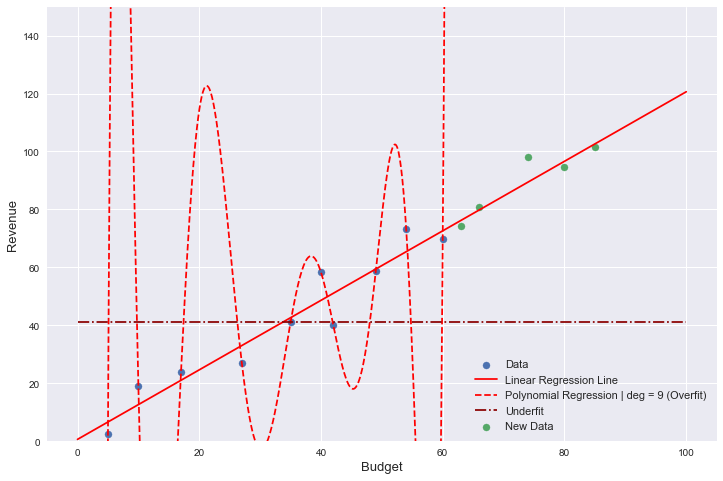

In [242]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.hlines(y = mean, xmin = 0, xmax = 100, linestyle = "-.", color = "darkred", label = "Underfit")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

__Solutions__ to overcome underfitting:

- use a __more powerful model__ with more parameters<br>
- add more/better features (independent variables) to the algorithm -> Feature Engineering <br>
- reduce the constraints of the model -> make it more complex with __less Regularization__

### Simple linear model to predict financial returns

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [282]:
GBPUSD = yf.download('GBPUSD=x','2022-08-25','2022-09-06',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [283]:
data = pd.DataFrame(index = GBPUSD.index)
data['price'] = GBPUSD["Close"]

In [284]:
data

,price
Datetime,
2022-08-24 19:30:00+01:00,1.179259
2022-08-24 19:35:00+01:00,1.179830
2022-08-24 19:40:00+01:00,1.179760
2022-08-24 19:45:00+01:00,1.179134
2022-08-24 19:50:00+01:00,1.178675
...,...
2022-09-05 19:05:00+01:00,1.152007
2022-09-05 19:10:00+01:00,1.151808
2022-09-05 19:15:00+01:00,1.151981


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2268 entries, 2022-08-24 19:30:00+01:00 to 2022-09-05 19:25:00+01:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2268 non-null   float64
dtypes: float64(1)
memory usage: 35.4 KB


In [286]:
data["returns"] = np.log(data.div(data.shift(1)))
data

,price,returns
Datetime,,
2022-08-24 19:30:00+01:00,1.179259,NaN
2022-08-24 19:35:00+01:00,1.179830,0.000484
2022-08-24 19:40:00+01:00,1.179760,-0.000059
2022-08-24 19:45:00+01:00,1.179134,-0.000531
2022-08-24 19:50:00+01:00,1.178675,-0.000389
...,...,...
2022-09-05 19:05:00+01:00,1.152007,0.000046
2022-09-05 19:10:00+01:00,1.151808,-0.000173
2022-09-05 19:15:00+01:00,1.151981,0.000150


In [287]:
data["lag1"] = data.returns.shift(1)
data

,price,returns,lag1
Datetime,,,
2022-08-24 19:30:00+01:00,1.179259,NaN,NaN
2022-08-24 19:35:00+01:00,1.179830,0.000484,NaN
2022-08-24 19:40:00+01:00,1.179760,-0.000059,0.000484
2022-08-24 19:45:00+01:00,1.179134,-0.000531,-0.000059
2022-08-24 19:50:00+01:00,1.178675,-0.000389,-0.000531
...,...,...,...
2022-09-05 19:05:00+01:00,1.152007,0.000046,0.000138
2022-09-05 19:10:00+01:00,1.151808,-0.000173,0.000046
2022-09-05 19:15:00+01:00,1.151981,0.000150,-0.000173


In [288]:
data.dropna(inplace = True)

In [289]:
data

,price,returns,lag1
Datetime,,,
2022-08-24 19:40:00+01:00,1.179760,-0.000059,0.000484
2022-08-24 19:45:00+01:00,1.179134,-0.000531,-0.000059
2022-08-24 19:50:00+01:00,1.178675,-0.000389,-0.000531
2022-08-24 19:55:00+01:00,1.178773,0.000083,-0.000389
2022-08-24 20:00:00+01:00,1.178939,0.000141,0.000083
...,...,...,...
2022-09-05 19:05:00+01:00,1.152007,0.000046,0.000138
2022-09-05 19:10:00+01:00,1.151808,-0.000173,0.000046
2022-09-05 19:15:00+01:00,1.151981,0.000150,-0.000173


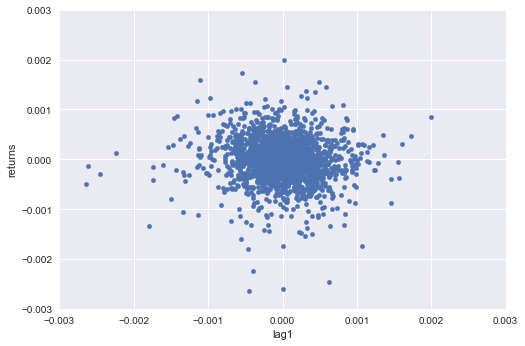

In [296]:
data.iloc[:, -2:].plot(kind = "scatter", x = "lag1", y = "returns")
plt.xlim(-0.003, 0.003)
plt.ylim(-0.003, 0.003)
plt.show()

In [297]:
from sklearn.linear_model import LinearRegression

In [298]:
lm = LinearRegression(fit_intercept = True)

In [299]:
lm.fit(data.lag1.to_frame(), data.returns)

LinearRegression()

In [300]:
slope = lm.coef_
slope

array([-0.11374973])

In [301]:
intercept = lm.intercept_
intercept

-1.1795044266109443e-05

In [302]:
data["pred"] = lm.predict(data.lag1.to_frame())

In [303]:
data

,price,returns,lag1,pred
Datetime,,,,
2022-08-24 19:40:00+01:00,1.179760,-0.000059,0.000484,-0.000067
2022-08-24 19:45:00+01:00,1.179134,-0.000531,-0.000059,-0.000005
2022-08-24 19:50:00+01:00,1.178675,-0.000389,-0.000531,0.000049
2022-08-24 19:55:00+01:00,1.178773,0.000083,-0.000389,0.000032
2022-08-24 20:00:00+01:00,1.178939,0.000141,0.000083,-0.000021
...,...,...,...,...
2022-09-05 19:05:00+01:00,1.152007,0.000046,0.000138,-0.000028
2022-09-05 19:10:00+01:00,1.151808,-0.000173,0.000046,-0.000017
2022-09-05 19:15:00+01:00,1.151981,0.000150,-0.000173,0.000008


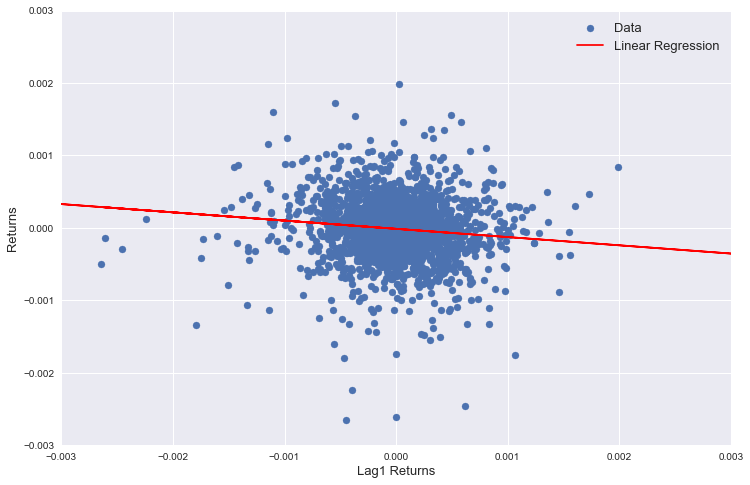

In [304]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.003, 0.003)
plt.ylim(-0.003, 0.003)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

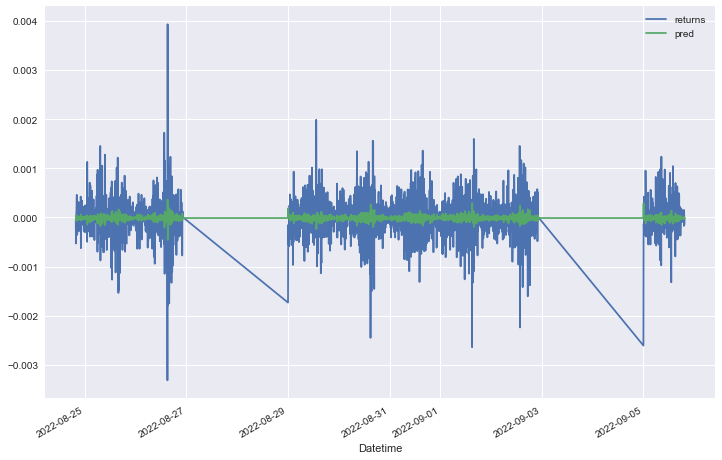

In [305]:
data[["returns", "pred"]].plot(figsize = (12, 8))
plt.show() # model fails to predict the magnitude of returns

In [306]:
data.pred = np.sign(data.pred) # maybe the model can predict the market direction (-1 / +1)

In [307]:
data

,price,returns,lag1,pred
Datetime,,,,
2022-08-24 19:40:00+01:00,1.179760,-0.000059,0.000484,-1.0
2022-08-24 19:45:00+01:00,1.179134,-0.000531,-0.000059,-1.0
2022-08-24 19:50:00+01:00,1.178675,-0.000389,-0.000531,1.0
2022-08-24 19:55:00+01:00,1.178773,0.000083,-0.000389,1.0
2022-08-24 20:00:00+01:00,1.178939,0.000141,0.000083,-1.0
...,...,...,...,...
2022-09-05 19:05:00+01:00,1.152007,0.000046,0.000138,-1.0
2022-09-05 19:10:00+01:00,1.151808,-0.000173,0.000046,-1.0
2022-09-05 19:15:00+01:00,1.151981,0.000150,-0.000173,1.0


In [308]:
np.sign(data.returns * data.pred)

Datetime
2022-08-24 19:40:00+01:00    1.0
2022-08-24 19:45:00+01:00    1.0
2022-08-24 19:50:00+01:00   -1.0
2022-08-24 19:55:00+01:00    1.0
2022-08-24 20:00:00+01:00   -1.0
                            ... 
2022-09-05 19:05:00+01:00   -1.0
2022-09-05 19:10:00+01:00    1.0
2022-09-05 19:15:00+01:00    1.0
2022-09-05 19:20:00+01:00    1.0
2022-09-05 19:25:00+01:00   -1.0
Length: 2266, dtype: float64

In [309]:
hits = np.sign(data.returns * data.pred).value_counts()

In [310]:
hits

 1.0    1191
-1.0    1033
 0.0      42
dtype: int64

In [311]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio # percentage of correctly forecasted market directions 

0.5255957634598412

### A Multiple Regression Model to predict Financial Returns

__Adding more Features - a multiple Regression Model__

In [426]:
GBPUSD = yf.download('GBPUSD=x','2022-08-25','2022-09-06',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [427]:
data = pd.DataFrame(index = GBPUSD.index)
data['price'] = GBPUSD["Close"]

In [428]:
data["returns"] = np.log(data.div(data.shift(1)))

In [429]:
lags = 5

In [430]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [431]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5
Datetime,,,,,,,
2022-08-24 20:00:00+01:00,1.178939,0.000141,0.000083,-0.000389,-0.000531,-0.000059,0.000484
2022-08-24 20:05:00+01:00,1.179412,0.000401,0.000141,0.000083,-0.000389,-0.000531,-0.000059
2022-08-24 20:10:00+01:00,1.179955,0.000460,0.000401,0.000141,0.000083,-0.000389,-0.000531
2022-08-24 20:15:00+01:00,1.179941,-0.000012,0.000460,0.000401,0.000141,0.000083,-0.000389
2022-08-24 20:20:00+01:00,1.179523,-0.000354,-0.000012,0.000460,0.000401,0.000141,0.000083
...,...,...,...,...,...,...,...
2022-09-05 19:05:00+01:00,1.152007,0.000046,0.000138,0.000138,-0.000069,-0.000069,0.000046
2022-09-05 19:10:00+01:00,1.151808,-0.000173,0.000046,0.000138,0.000138,-0.000069,-0.000069
2022-09-05 19:15:00+01:00,1.151981,0.000150,-0.000173,0.000046,0.000138,0.000138,-0.000069


In [432]:
lm = LinearRegression(fit_intercept = True)

In [433]:
lm.fit(data[cols], data.returns)

LinearRegression()

In [434]:
lm.coef_

array([-0.11655732, -0.02057345,  0.04153687,  0.00859797,  0.00462699])

In [435]:
lm.intercept_

-1.1056382083805916e-05

In [436]:
data["pred"] = lm.predict(data[cols].values)

/Users/ad06/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [437]:
data.pred = np.sign(data.pred)

In [438]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
Datetime,,,,,,,,
2022-08-24 20:00:00+01:00,1.178939,0.000141,0.000083,-0.000389,-0.000531,-0.000059,0.000484,-1.0
2022-08-24 20:05:00+01:00,1.179412,0.000401,0.000141,0.000083,-0.000389,-0.000531,-0.000059,-1.0
2022-08-24 20:10:00+01:00,1.179955,0.000460,0.000401,0.000141,0.000083,-0.000389,-0.000531,-1.0
2022-08-24 20:15:00+01:00,1.179941,-0.000012,0.000460,0.000401,0.000141,0.000083,-0.000389,-1.0
2022-08-24 20:20:00+01:00,1.179523,-0.000354,-0.000012,0.000460,0.000401,0.000141,0.000083,-1.0
...,...,...,...,...,...,...,...,...
2022-09-05 19:05:00+01:00,1.152007,0.000046,0.000138,0.000138,-0.000069,-0.000069,0.000046,-1.0
2022-09-05 19:10:00+01:00,1.151808,-0.000173,0.000046,0.000138,0.000138,-0.000069,-0.000069,-1.0
2022-09-05 19:15:00+01:00,1.151981,0.000150,-0.000173,0.000046,0.000138,0.000138,-0.000069,1.0


In [439]:
data.pred.value_counts()

-1.0    1386
 1.0     876
Name: pred, dtype: int64

In [440]:
hit = np.sign(data.returns * data.pred).value_counts()

In [441]:
hit

 1.0    1186
-1.0    1034
 0.0      42
dtype: int64

In [442]:
hit_ratio = hit[1.0] / sum(hit)
hit_ratio

0.5243147656940761

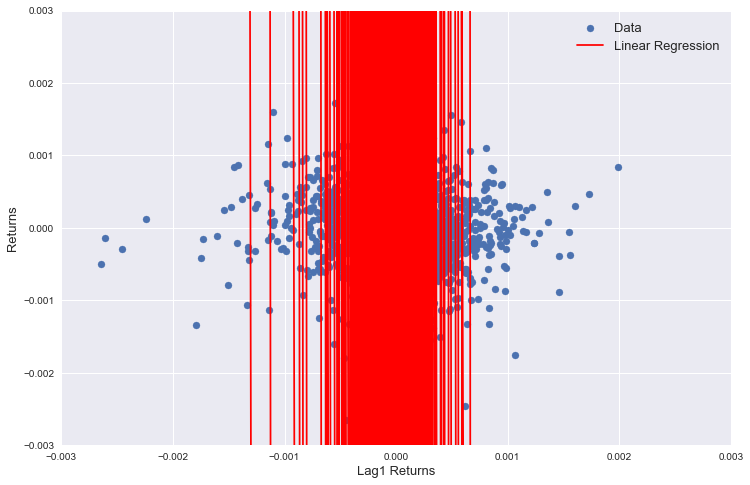

In [443]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.003, 0.003)
plt.ylim(-0.003, 0.003)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

### In sample backtesting

In [444]:
data["strategy"] = data.pred * data.returns

In [445]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

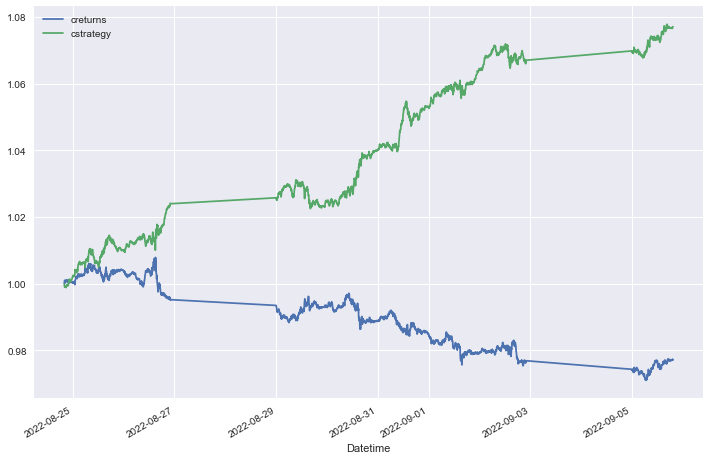

In [446]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

### Out Sample Forward Testing

In [447]:
GBPUSD = yf.download('GBPUSD=x','2022-09-07','2022-09-18',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [448]:
data = pd.DataFrame(index = GBPUSD.index)
data['price'] = GBPUSD["Close"]

In [449]:
data["returns"] = np.log(data.div(data.shift(1)))

In [450]:
lags = 5

In [451]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [452]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5
Datetime,,,,,,,
2022-09-06 20:00:00+01:00,1.152100,-0.000196,-0.000277,0.000127,0.000000,-0.000023,0.000242
2022-09-06 20:05:00+01:00,1.152326,0.000196,-0.000196,-0.000277,0.000127,0.000000,-0.000023
2022-09-06 20:10:00+01:00,1.152592,0.000230,0.000196,-0.000196,-0.000277,0.000127,0.000000
2022-09-06 20:15:00+01:00,1.152592,0.000000,0.000230,0.000196,-0.000196,-0.000277,0.000127
2022-09-06 20:20:00+01:00,1.152153,-0.000380,0.000000,0.000230,0.000196,-0.000196,-0.000277
...,...,...,...,...,...,...,...
2022-09-16 22:05:00+01:00,1.142283,0.000000,-0.000148,0.000148,0.000685,-0.000331,0.000137
2022-09-16 22:10:00+01:00,1.142283,0.000000,0.000000,-0.000148,0.000148,0.000685,-0.000331
2022-09-16 22:15:00+01:00,1.142283,0.000000,0.000000,0.000000,-0.000148,0.000148,0.000685


In [453]:
data["pred"] = lm.predict(data[cols].values)

/Users/ad06/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [454]:
data.pred = np.sign(data.pred)

In [455]:
hits = np.sign(data.returns * data.pred).value_counts()

In [456]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.49913569576490924

In [457]:
data["strategy"] = data.pred * data.returns

In [458]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

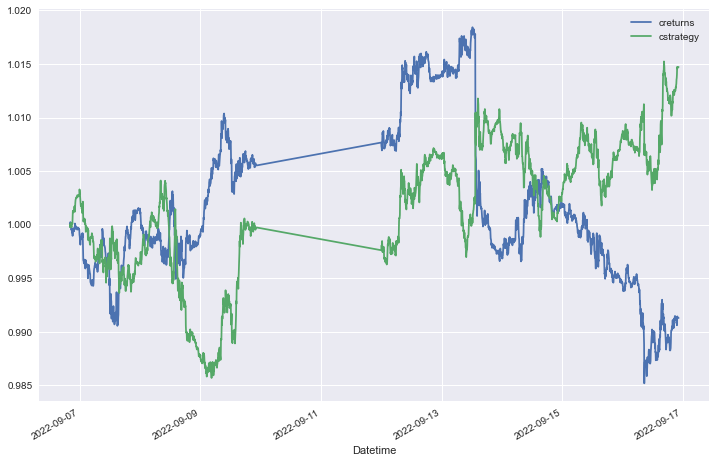

In [459]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()